In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline\

# 한글 처리 (구글링)
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from itertools import permutations, combinations

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/data_project'

In [ ]:
rank = pd.read_csv(path + '/은경s/kbreport_team_wlr.csv', sep=',')
rank = rank.drop(['Unnamed: 0'], axis = 1)
rank = rank[rank['연도']>=2015]
rank.head()

,연도,팀명,순위,팀승,팀무,팀패,승률,기대승률
0,2015,삼성,1,88,0,56,0.611,0.601
1,2015,NC,2,84,3,57,0.596,0.613
2,2015,두산,3,79,0,65,0.549,0.518
3,2015,키움,4,78,1,65,0.545,0.561
4,2015,SK,5,69,2,73,0.486,0.480


In [ ]:
td = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/data_project/은경s/kbo_2001_2020_defense.csv', sep=',', encoding='cp949' )
tm_def = td.drop(['Unnamed: 0', '경기'], axis = 1)
tm_def = tm_def[tm_def['연도']>=2015]
tm_def.head()

,연도,팀명,실책,견제사,자살,보살,병살,수비율,포일,도루허용,도루실패,도루저지율
114,2015,넥센,110,24,3858,1540,138,0.980,10,111,52,31.9
115,2015,두산,93,7,3858,1498,134,0.983,6,109,48,30.6
116,2015,롯데,114,10,3844,1569,138,0.979,16,107,54,33.5
117,2015,SK,95,7,3842,1471,130,0.982,6,108,51,32.1
118,2015,LG,103,14,3839,1608,162,0.981,8,127,52,29.1


In [ ]:
th = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/data_project/은경s/kbo_2001_2020_hitter.csv', sep=',', encoding='cp949' )
tm_hit = th.drop(['Unnamed: 0', '경기'], axis = 1)
tm_hit = tm_hit[tm_hit['연도']>=2015]
tm_hit.head()

,연도,팀명,타율,타석,타수,득점,안타,2루타,3루타,홈런,루타,타점,희생번트,희생플라이,볼넷,고의4구,사구,삼진,병살타,장타율,출루율,OPS,멀티히트,득점권타율,대타타율
114,2015,삼성,0.302,5803,5019,897,1515,259,25,176,2352,850,76,57,581,21,70,930,109,0.469,0.378,0.847,143,0.311,0.239
115,2015,넥센,0.298,5811,5069,904,1512,304,20,203,2465,855,61,55,544,18,82,1098,112,0.486,0.372,0.858,141,0.298,0.270
116,2015,두산,0.290,5759,4957,807,1436,254,22,140,2154,770,75,60,567,24,99,820,139,0.435,0.370,0.805,143,0.287,0.262
117,2015,NC,0.289,5727,4967,844,1437,283,28,161,2259,802,64,53,536,25,106,1023,105,0.455,0.367,0.822,144,0.293,0.280
118,2015,롯데,0.280,5680,4972,765,1393,254,19,177,2216,727,80,28,532,22,68,1186,136,0.446,0.356,0.802,144,0.274,0.183


In [ ]:
tp = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/data_project/은경s/kbo_2001_2020_pitcher.csv', sep=',', encoding='cp949' )
tm_pit = tp.drop(['Unnamed: 0', '경기'], axis = 1)
tm_pit = tm_pit[tm_pit['연도']>=2015]
tm_pit.head()

,연도,팀명,평균자책점,승리,패배,세이브,홀드,승률,이닝,피안타,홈런,볼넷,사구,삼진,실점,자책점,이닝당출루허용률,완투,완봉,QS,블론,타자수,투구수,피안타율,2루타,3루타,희생번트,희생플라이,고의4구,폭투,보크
114,2015,NC,4.26,84,57,37,55,0.596,1279,1283,149,436,113,1057,655,605,1.34,1,11,55,11,5536,21650,0.264,221,17,79,50,13,60,3
115,2015,LG,4.62,64,78,25,44,0.451,1279,1352,125,490,98,1063,721,657,1.44,3,5,57,15,5599,21661,0.277,227,26,91,37,30,82,3
116,2015,삼성,4.69,88,56,34,60,0.611,1275,1323,182,423,64,1194,716,665,1.37,4,7,75,10,5523,21832,0.268,270,17,67,37,11,44,2
117,2015,SK,4.71,69,73,31,60,0.486,1280,1358,153,517,70,1149,724,670,1.46,3,7,57,12,5646,22190,0.275,270,11,77,38,31,71,4
118,2015,KIA,4.79,67,77,32,65,0.465,1273,1371,143,572,98,979,739,678,1.53,1,10,44,17,5673,22126,0.283,252,31,101,49,22,80,4


In [ ]:
tr = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/data_project/은경s/kbo_2001_2020_runner.csv', sep=',', encoding='cp949' )
tm_run = tr.drop(['Unnamed: 0', '경기'], axis = 1)
tm_run = tm_run[tm_run['연도']>=2015]
tm_run.head()

,연도,팀명,도루시도,도루허용,도루실패,도루성공률,주루사,견제사
114,2015,NC,264,204,60,77.3,50,14
115,2015,삼성,209,157,52,75.1,60,6
116,2015,KT,176,124,52,70.5,58,10
117,2015,KIA,165,115,50,69.7,60,13
118,2015,LG,175,113,62,64.6,55,9


In [ ]:
re_hit_main = pd.read_csv( path + '/은경s/kbreport_hit_main.csv', sep=',', encoding='cp949' )
re_hit_main = re_hit_main.drop(['Unnamed: 0', '기대승률', 'WAR', 'wOBA'], axis = 1)
re_hit_main['승률'][re_hit_main['승률']=='-'] = '0'
re_hit_main['승률'] = re_hit_main['승률'].map(lambda x : float(x))
re_hit_main.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,연도,월,순위,팀명,경기,승,무,패,승률,R/G,득점,홈런,도루,볼넷%,삼진%,BABIP,타율,출루율,장타율,OPS
0,2015,3,1,롯데,3,3,0,0,1.000,8.00,24,5,4,14.3,23.5,0.379,0.303,0.415,0.525,0.940
1,2015,3,2,두산,2,2,0,0,1.000,6.50,13,4,1,8.3,6.9,0.268,0.297,0.352,0.516,0.868
2,2015,3,3,KIA,2,2,0,0,1.000,5.00,10,4,2,12.3,9.6,0.260,0.283,0.380,0.550,0.930
3,2015,3,4,삼성,3,2,0,1,0.667,5.67,17,3,8,8.0,12.0,0.347,0.319,0.379,0.469,0.848
4,2015,3,5,한화,2,1,0,1,0.500,4.50,9,1,6,13.7,16.8,0.310,0.257,0.385,0.351,0.736


In [ ]:
re_hit_std = pd.read_csv( path + '/은경s/kbreport_hit_standard.csv', sep=',', encoding='cp949' )
re_hit_std = re_hit_std.drop('Unnamed: 0', axis = 1)
re_hit_std.head()

,연도,월,순위,팀명,경기,타석,타수,안타,단타,2루타,3루타,홈런,득점,타점,볼넷,고4,HBP,삼진,희플,희타,병살,도루,도실,타율
0,2015,3,1,롯데,3,119,99,30,18,7,0,5,24,23,17,1,2,28,0,1,1,4,0,0.303
1,2015,3,2,두산,2,72,64,19,14,0,1,4,13,13,6,1,0,5,1,1,2,1,0,0.297
2,2015,3,3,KIA,2,73,60,17,10,2,1,4,10,10,9,0,1,7,1,3,1,2,0,0.283
3,2015,3,4,삼성,3,125,113,36,25,8,0,3,17,17,10,0,1,15,0,1,1,8,0,0.319
4,2015,3,5,한화,2,95,74,19,14,4,0,1,9,9,13,0,3,16,1,5,1,6,0,0.257


In [ ]:
re_hit_det = pd.read_csv( path + '/은경s/kbreport_hit_detail.csv', sep=',', encoding='cp949' )
re_hit_det = re_hit_det.drop(['Unnamed: 0', 'wRAA', 'wOBA', '타수/홈런'], axis = 1)
re_hit_det.rename(columns={'탸셕':'타석'}, inplace=True)
re_hit_det.head()

,연도,월,순위,팀명,경기,타석,타율,BABIP,볼넷%,삼진%,볼/삼,ISO,OPS,RC,RC/27,wRC,SPD,wSB,도실
0,2015,3,1,롯데,3,119,0.303,0.379,14.3,23.5,0.61,0.222,0.940,22.91,8.48,22.45,5.43,0.77,0.413
1,2015,3,2,두산,2,72,0.297,0.268,8.3,6.9,1.20,0.219,0.868,11.45,6.44,10.87,5.37,0.22,0.372
2,2015,3,3,KIA,2,73,0.283,0.260,12.3,9.6,1.29,0.267,0.930,13.61,7.82,13.04,5.88,0.39,0.402
3,2015,3,4,삼성,3,125,0.319,0.347,8.0,12.0,0.67,0.150,0.848,21.79,7.36,19.71,5.63,1.43,0.379
4,2015,3,5,한화,2,95,0.257,0.310,13.7,16.8,0.81,0.094,0.736,12.09,5.18,12.27,4.87,1.08,0.348


In [ ]:
re_pit_main = pd.read_csv( path + '/은경s/kbreport_pit_main.csv', sep=',', encoding='cp949' )
re_pit_main = re_pit_main.drop('Unnamed: 0', axis = 1)
re_pit_main['승률'][re_pit_main['승률']=='-'] = '0'
re_pit_main['승률'] = re_pit_main['승률'].map(lambda x : float(x))
re_pit_main.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,연도,월,순위,팀명,경기,팀승,팀무,팀패,승률,RA/G,실점,자책,피홈런,볼넷%,삼진%,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR
0,2015,3,1,두산,2,2,0,0,1.000,2.50,5,5,0,7.9,11.8,0.300,80.0,2.50,0.76,3.78,4.01,0.39
1,2015,3,2,KIA,2,2,0,0,1.000,3.50,7,7,0,9.1,15.6,0.386,75.9,3.50,0.96,3.45,3.55,0.40
2,2015,3,3,롯데,3,3,0,0,1.000,4.67,14,14,2,14.8,16.5,0.347,74.1,5.04,0.76,5.06,5.21,0.49
3,2015,3,4,삼성,3,2,0,1,0.667,4.67,14,14,1,12.2,18.3,0.263,63.6,4.67,0.64,4.21,4.30,0.39
4,2015,3,5,한화,2,1,0,1,0.500,4.00,8,8,2,11.8,16.5,0.228,78.5,3.54,1.08,5.29,5.46,0.22


In [ ]:
re_pit_std = pd.read_csv( path + '/은경s/kbreport_pit_standard.csv', sep=',', encoding='cp949' )
re_pit_std = re_pit_std.drop('Unnamed: 0', axis = 1)
re_pit_std['이닝'] = np.trunc(re_pit_std['이닝']) + re_pit_std['이닝']*10 % 10 / 3
re_pit_std.head()

,연도,월,순위,팀명,경기,승,패,세,홀드,블론,QS,이닝,타자,안타,2루타,3루타,홈런,실점,자책,삼진,볼넷,고4,HBP,폭투,보크,PK,도루,도실
0,2015,3,1,두산,2,2,0,1,3,0,1,18.000000,76,18,3,0,0,5,5,9,6,0,1,0,1,0,2,2
1,2015,3,2,KIA,2,2,0,1,1,0,1,18.000000,77,22,7,1,0,7,7,12,7,0,0,1,0,0,3,1
2,2015,3,3,롯데,3,3,0,1,5,0,2,25.000000,115,28,4,0,2,14,14,19,17,2,1,0,0,0,2,3
3,2015,3,4,삼성,3,2,1,1,3,0,1,27.000000,115,21,7,1,1,14,14,21,14,0,1,0,0,1,1,3
4,2015,3,5,한화,2,1,1,1,2,1,1,20.333333,85,15,4,0,2,8,8,14,10,0,2,1,0,2,2,0


In [ ]:
re_pit_det = pd.read_csv( path + '/은경s/kbreport_pit_detail.csv', sep=',', encoding='cp949' )
re_pit_det = re_pit_det.drop('Unnamed: 0', axis = 1)
re_pit_det['삼/볼'][re_pit_det['삼/볼'] == '-'] = '0'
re_pit_det['삼/볼'] = re_pit_det['삼/볼'].map(lambda x : float(x))
re_pit_det.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,연도,월,순위,팀명,경기,QS,완투,완봉,삼진/9,볼넷/9,홈런/9,삼/볼,피안타율,피출루율,피장타율,피OPS,WHIP,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR
0,2015,3,1,두산,2,1,0,0,4.50,3.00,0.00,1.50,0.269,0.329,0.313,0.642,1.33,0.300,80.0,2.50,0.76,3.78,4.01,0.39
1,2015,3,2,KIA,2,1,0,0,6.00,3.50,0.00,1.71,0.324,0.382,0.456,0.837,1.61,0.386,75.9,3.50,0.96,3.45,3.55,0.40
2,2015,3,3,롯데,3,2,0,0,6.84,6.12,0.72,1.12,0.295,0.404,0.400,0.804,1.80,0.347,74.1,5.04,0.76,5.06,5.21,0.49
3,2015,3,4,삼성,3,1,0,0,7.00,4.67,0.33,1.50,0.216,0.319,0.340,0.659,1.30,0.263,63.6,4.67,0.64,4.21,4.30,0.39
4,2015,3,5,한화,2,1,0,0,6.20,4.43,0.89,1.40,0.205,0.318,0.342,0.660,1.23,0.228,78.5,3.54,1.08,5.29,5.46,0.22


In [ ]:
tmp = pd.merge(re_hit_main, re_hit_det)
re_hit_all = pd.concat([tmp, re_hit_std.drop(columns=['연도','월','순위','팀명','경기','타석','홈런','득점','타율','도루','도실'])], axis=1)
re_hit_all.head()

,연도,월,순위,팀명,경기,승,무,패,승률,R/G,득점,홈런,도루,볼넷%,삼진%,BABIP,타율,출루율,장타율,OPS,타석,볼/삼,ISO,RC,RC/27,wRC,SPD,wSB,도실,타수,안타,단타,2루타,3루타,타점,볼넷,고4,HBP,삼진,희플,희타,병살
0,2015,3,1,롯데,3,3,0,0,1.000,8.00,24,5,4,14.3,23.5,0.379,0.303,0.415,0.525,0.940,119,0.61,0.222,22.91,8.48,22.45,5.43,0.77,0.413,99,30,18,7,0,23,17,1,2,28,0,1,1
1,2015,3,2,두산,2,2,0,0,1.000,6.50,13,4,1,8.3,6.9,0.268,0.297,0.352,0.516,0.868,72,1.20,0.219,11.45,6.44,10.87,5.37,0.22,0.372,64,19,14,0,1,13,6,1,0,5,1,1,2
2,2015,3,3,KIA,2,2,0,0,1.000,5.00,10,4,2,12.3,9.6,0.260,0.283,0.380,0.550,0.930,73,1.29,0.267,13.61,7.82,13.04,5.88,0.39,0.402,60,17,10,2,1,10,9,0,1,7,1,3,1
3,2015,3,4,삼성,3,2,0,1,0.667,5.67,17,3,8,8.0,12.0,0.347,0.319,0.379,0.469,0.848,125,0.67,0.150,21.79,7.36,19.71,5.63,1.43,0.379,113,36,25,8,0,17,10,0,1,15,0,1,1
4,2015,3,5,한화,2,1,0,1,0.500,4.50,9,1,6,13.7,16.8,0.310,0.257,0.385,0.351,0.736,95,0.81,0.094,12.09,5.18,12.27,4.87,1.08,0.348,74,19,14,4,0,9,13,0,3,16,1,5,1


In [ ]:
tmp = pd.concat([re_pit_main, re_pit_det.drop(columns=['연도','월','순위','팀명','경기','WHIP','BABIP','LOB%','ERA','RA9-WAR','FIP','kFIP','WAR'])], axis=1)
re_pit_all = pd.concat([tmp, re_pit_std.drop(columns=['연도','월','순위','팀명','경기','승','패','홈런','실점','자책'])], axis=1)
re_pit_all.head()

,연도,월,순위,팀명,경기,팀승,팀무,팀패,승률,RA/G,실점,자책,피홈런,볼넷%,삼진%,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,QS,완투,완봉,삼진/9,볼넷/9,홈런/9,삼/볼,피안타율,피출루율,피장타율,피OPS,세,홀드,블론,QS,이닝,타자,안타,2루타,3루타,삼진,볼넷,고4,HBP,폭투,보크,PK,도루,도실
0,2015,3,1,두산,2,2,0,0,1.000,2.50,5,5,0,7.9,11.8,0.300,80.0,2.50,0.76,3.78,4.01,0.39,1,0,0,4.50,3.00,0.00,1.50,0.269,0.329,0.313,0.642,1,3,0,1,18.000000,76,18,3,0,9,6,0,1,0,1,0,2,2
1,2015,3,2,KIA,2,2,0,0,1.000,3.50,7,7,0,9.1,15.6,0.386,75.9,3.50,0.96,3.45,3.55,0.40,1,0,0,6.00,3.50,0.00,1.71,0.324,0.382,0.456,0.837,1,1,0,1,18.000000,77,22,7,1,12,7,0,0,1,0,0,3,1
2,2015,3,3,롯데,3,3,0,0,1.000,4.67,14,14,2,14.8,16.5,0.347,74.1,5.04,0.76,5.06,5.21,0.49,2,0,0,6.84,6.12,0.72,1.12,0.295,0.404,0.400,0.804,1,5,0,2,25.000000,115,28,4,0,19,17,2,1,0,0,0,2,3
3,2015,3,4,삼성,3,2,0,1,0.667,4.67,14,14,1,12.2,18.3,0.263,63.6,4.67,0.64,4.21,4.30,0.39,1,0,0,7.00,4.67,0.33,1.50,0.216,0.319,0.340,0.659,1,3,0,1,27.000000,115,21,7,1,21,14,0,1,0,0,1,1,3
4,2015,3,5,한화,2,1,0,1,0.500,4.00,8,8,2,11.8,16.5,0.228,78.5,3.54,1.08,5.29,5.46,0.22,1,0,0,6.20,4.43,0.89,1.40,0.205,0.318,0.342,0.660,1,2,1,1,20.333333,85,15,4,0,14,10,0,2,1,0,2,2,0


In [ ]:
lt_hit_vs = pd.read_csv(path + '/현정s/csv/롯데기록/LotteHitterVS.csv', sep=',')
lt_hit_vs = lt_hit_vs.drop('Unnamed: 0', axis = 1)
lt_hit_vs.head()

,연도,팀,경기수,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,득점
0,2020,한화,9,334,100,18,2,12,51,30,8,63,53
1,2020,KIA,7,219,44,7,0,3,14,18,2,56,14
2,2020,kt,9,320,94,18,0,9,51,28,1,51,53
3,2020,LG,6,219,70,7,0,7,36,23,2,39,38
4,2020,NC,3,108,31,5,0,5,19,15,2,20,19


In [ ]:
lt_pit_vs = pd.read_csv(path + '/현정s/csv/롯데기록/LottePitcherVS.csv', sep=',')
lt_pit_vs = lt_pit_vs.drop('Unnamed: 0', axis = 1)
lt_pit_vs['이닝'] = lt_pit_vs['이닝'].map(lambda x : float(x.split(' ')[0]) + (float(x.split(' ')[1][0])/3 if len(x.split(' ')) == 2 else 0))
lt_pit_vs.head()

,연도,팀,경기수,타수,피안타,자책점,승,패,세이브,홀드,이닝,탈삼진,볼넷,방어율,피홈런,사구,실점,피안타율
0,2020,한화,9,307,69,17,6,3,1,5,84.000000,62,27,2.51,3,6,25,0.193
1,2020,KIA,7,242,80,49,1,6,0,0,57.000000,37,25,11.89,12,4,49,0.309
2,2020,kt,9,299,69,26,7,2,2,5,80.666667,65,19,3.79,11,1,27,0.234
3,2020,LG,6,204,60,37,3,3,1,5,53.333333,41,16,6.20,3,2,38,0.278
4,2020,NC,3,107,31,19,1,2,0,0,27.000000,18,9,10.41,6,1,23,0.324


In [ ]:
lt_hit_home = pd.read_csv(path + '/현정s/csv/롯데기록/LotteHomeHit.csv', sep=',')
lt_hit_home = lt_hit_home.drop('Unnamed: 0', axis = 1)
lt_hit_home.head()

,연도,홈원정,경기수,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,득점
0,2020,원정,37,1319,350,55,0,31,159,130,18,235,170
1,2020,홈,29,984,280,65,2,23,147,100,10,178,155
2,2019,원정,70,2513,631,99,14,44,277,221,32,541,291
3,2019,홈,71,2406,600,115,8,46,268,208,33,544,287
4,2018,원정,72,2617,750,143,6,106,397,241,42,603,418


In [ ]:
lt_pit_home = pd.read_csv(path + '/현정s/csv/롯데기록/LotteHomeP.csv', sep=',')
lt_pit_home = lt_pit_home.drop('Unnamed: 0', axis = 1)
lt_pit_home['이닝'] = lt_pit_home['이닝'].map(lambda x : float(x.split(' ')[0]) + (float(x.split(' ')[1][0])/3 if len(x.split(' ')) == 2 else 0))
lt_pit_home.head()

,연도,홈원정,경기수,타수,피안타,자책점,승,패,세이브,홀드,이닝,탈삼진,볼넷,방어율,피홈런,사구,실점,피안타율
0,2020,원정,37,1253,339,180,14,23,6,23,327.666667,252,128,6.09,40,12,195,0.275
1,2020,홈,29,1013,274,135,18,11,6,12,263.000000,200,87,6.76,36,11,147,0.292
2,2019,원정,72,2531,717,351,22,51,4,19,646.333333,530,286,6.95,55,42,393,0.293
3,2019,홈,72,2715,755,362,29,44,12,28,690.333333,561,278,9.00,72,31,400,0.289
4,2018,원정,72,2445,665,354,34,36,13,29,621.666667,582,254,6.52,75,45,402,0.285


In [ ]:
lt_hit_month = pd.read_csv(path + '/현정s/csv/롯데기록/LotteMonthHitter.csv', sep=',')
lt_hit_month = lt_hit_month.drop('Unnamed: 0', axis = 1)
lt_hit_month.head()

,연도,월,경기수,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,득점
0,2020,5,23,801,204,45,0,15,92,82,12,151,101
1,2020,6,23,809,231,41,2,20,111,76,7,139,116
2,2020,7,20,693,195,34,0,19,103,72,9,123,108
3,2019,3,8,270,68,18,1,4,40,26,2,60,41
4,2019,4,22,760,204,27,6,14,89,75,12,166,99


In [ ]:
lt_pit_month = pd.read_csv(path + '/현정s/csv/롯데기록/LotteMonthPitcher.csv', sep=',')
lt_pit_month = lt_pit_month.drop('Unnamed: 0', axis = 1)
lt_pit_month['이닝'] = lt_pit_month['이닝'].map(lambda x : float(x.split(' ')[0]) + (float(x.split(' ')[1][0])/3 if len(x.split(' ')) == 2 else 0))
lt_pit_month.head()

,연도,월,경기수,타수,피안타,자책점,승,패,세이브,홀드,이닝,탈삼진,볼넷,방어율,피홈런,사구,실점,피안타율
0,2020,5,23,789,210,111,11,12,3,11,208.333333,158,91,6.07,25,8,118,0.271
1,2020,6,23,779,205,102,12,11,4,9,205.666667,158,56,5.61,26,9,105,0.254
2,2020,7,20,698,198,102,9,11,5,15,176.666667,136,68,7.56,25,6,119,0.311
3,2019,3,8,330,87,56,3,6,0,3,81.666667,79,46,10.82,16,4,61,0.297
4,2019,4,22,876,250,124,10,13,4,12,220.666667,202,104,5.92,23,9,141,0.293


In [ ]:
lt_tm_re = pd.read_csv(path + '/현정s/csv/롯데기록/LotteTeamRecord.csv', sep=',')
lt_tm_re.head()

,연도,순위,경기,승리,패전,무,승률,득점,실점,홈런,도루,타율,방어율
0,2020,8,66,32,34,0,0.485,325,342,54,50,0.274,4.80
1,2019,10,144,48,93,3,0.340,578,764,90,65,0.250,4.83
2,2018,7,144,68,74,2,0.479,821,846,203,68,0.289,5.37
3,2017,3,144,80,62,2,0.563,743,701,151,92,0.285,4.56
4,2016,8,144,66,78,0,0.458,777,865,127,145,0.288,5.63


In [ ]:
kbo_all_def = pd.read_csv( path + '/현정s/csv/KBO선수 기록/KBO_ALL_DEFENSE.csv', sep=',', encoding='cp949' )
kbo_all_def = kbo_all_def.drop('Unnamed: 0', axis = 1)
kbo_all_def = kbo_all_def.drop_duplicates()
kbo_all_def['이닝'][kbo_all_def['이닝'] == '1/3'] = '0 1/3'
kbo_all_def['이닝'][kbo_all_def['이닝'] == '2/3'] = '0 2/3'
kbo_all_def['이닝'] = kbo_all_def['이닝'].map(lambda x : float(x.split(' ')[0]) + (float(x.split(' ')[1][0])/3 if len(x.split(' ')) == 2 else 0))
kbo_all_def['도루저지율'][kbo_all_def['도루저지율'] == '-'] = '0'
kbo_all_def['도루저지율'] = kbo_all_def['도루저지율'].map(lambda x : float(x))
kbo_all_def['수비율'][kbo_all_def['수비율'] == '-'] = '0'
kbo_all_def['수비율'] = kbo_all_def['수비율'].map(lambda x : float(x))
kbo_all_def['팀명'][kbo_all_def['팀명']=='넥센'] = '키움'
kbo_all_def.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: Se

,연도,선수이름,팀명,포지션,경기,선발경기,이닝,실책,견제사,자살,보살,병살,수비율,포일,도루허용,도루저지,도루저지율
0,2015,김하성,키움,유격수,140,139,1209.333333,21,0,212,408,87,0.967,0,0,0,0.0
1,2015,박병호,키움,1루수,131,131,1124.333333,12,0,1113,93,103,0.990,0,0,0,0.0
2,2015,박동원,키움,포수,126,122,1012.000000,10,6,858,96,10,0.990,9,75,32,29.9
3,2015,유한준,키움,우익수,81,68,570.666667,2,0,126,0,0,0.984,0,0,0,0.0
4,2015,이택근,키움,중견수,81,72,621.666667,0,0,128,3,0,1.000,0,0,0,0.0


In [ ]:
kbo_all_hit = pd.read_csv( path + '/현정s/csv/KBO선수 기록/KBO_ALL_HITTERS.csv', sep=',', encoding='cp949' )
kbo_all_hit = kbo_all_hit.drop('Unnamed: 0', axis = 1)
kbo_all_hit = kbo_all_hit.drop(kbo_all_hit[kbo_all_hit['타율']=='-'].index)
kbo_all_hit['타율'] = kbo_all_hit['타율'].map(lambda x : float(x))
kbo_all_hit['팀명'][kbo_all_hit['팀명']=='넥센'] = '키움'
kbo_all_hit.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,연도,선수이름,팀명,타율,경기,타석,타수,득점,안타,2루타,3루타,홈런,루타,타점,희생번트,희생플라이
0,2015,유한준,키움,0.362,139,598,520,103,188,42,1,23,301,116,1,8
1,2015,박병호,키움,0.343,140,622,528,129,181,35,1,53,377,146,0,4
2,2015,허정협,키움,0.333,4,6,6,1,2,0,0,0,2,0,0,0
3,2015,홍성갑,키움,0.333,7,10,9,0,3,0,0,0,3,2,0,0
4,2015,이택근,키움,0.326,105,401,347,61,113,16,1,10,161,44,3,4


In [ ]:
kbo_all_pit = pd.read_csv( path + '/현정s/csv/KBO선수 기록/KBO_ALL_PITCHERS.csv', sep=',', encoding='cp949' )
kbo_all_pit = kbo_all_pit.drop('Unnamed: 0', axis = 1)
kbo_all_pit = kbo_all_pit.drop(kbo_all_pit[kbo_all_pit['승률']=='-'].index)
kbo_all_pit['승률'] = kbo_all_pit['승률'].map(lambda x : float(x))
kbo_all_pit['평균자책점'] = kbo_all_pit['평균자책점'].map(lambda x : float(x))
kbo_all_pit['이닝당 출루허용률'] = kbo_all_pit['이닝당 출루허용률'].map(lambda x : float(x))
kbo_all_pit.rename(columns={'이닝당 출루허용률':'이닝당_출루허용률'}, inplace=True)
kbo_all_pit['이닝'][kbo_all_pit['이닝'] == '1/3'] = '0 1/3'
kbo_all_pit['이닝'][kbo_all_pit['이닝'] == '2/3'] = '0 2/3'
kbo_all_pit['이닝'] = kbo_all_pit['이닝'].map(lambda x : float(x.split(' ')[0]) + (float(x.split(' ')[1][0])/3 if len(x.split(' ')) == 2 else 0))
kbo_all_pit['팀명'][kbo_all_pit['팀명']=='넥센'] = '키움'
kbo_all_pit.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,연도,선수이름,팀명,평균자책점,경기,승,패,세이브,홀드,승률,이닝,피안타,홈런,볼넷,사구,삼진,실점,자책점,이닝당_출루허용률
1,2015,양훈,키움,1.41,16,2,1,0,0,0.667,38.333333,33,1,14,0,15,9,6,1.23
2,2015,조상우,키움,3.09,70,8,5,5,19,0.615,93.333333,65,4,41,6,89,36,32,1.14
3,2015,밴헤켄,키움,3.62,32,15,8,0,0,0.652,196.666667,190,14,67,1,193,92,79,1.31
4,2015,손승락,키움,3.82,58,4,6,23,0,0.400,61.333333,73,6,13,3,63,35,26,1.40
5,2015,김영민,키움,4.38,57,4,5,0,6,0.444,90.333333,90,14,28,7,85,47,44,1.31


 - 각 파라미터별 년도별 순위와의 상관관계 분석

In [ ]:
re_hit_all.head()

,연도,월,순위,팀명,경기,승,무,패,승률,R/G,득점,홈런,도루,볼넷%,삼진%,BABIP,타율,출루율,장타율,OPS,타석,볼/삼,ISO,RC,RC/27,wRC,SPD,wSB,도실,타수,안타,단타,2루타,3루타,타점,볼넷,고4,HBP,삼진,희플,희타,병살
0,2015,3,1,롯데,3,3,0,0,1.000,8.00,24,5,4,14.3,23.5,0.379,0.303,0.415,0.525,0.940,119,0.61,0.222,22.91,8.48,22.45,5.43,0.77,0.413,99,30,18,7,0,23,17,1,2,28,0,1,1
1,2015,3,2,두산,2,2,0,0,1.000,6.50,13,4,1,8.3,6.9,0.268,0.297,0.352,0.516,0.868,72,1.20,0.219,11.45,6.44,10.87,5.37,0.22,0.372,64,19,14,0,1,13,6,1,0,5,1,1,2
2,2015,3,3,KIA,2,2,0,0,1.000,5.00,10,4,2,12.3,9.6,0.260,0.283,0.380,0.550,0.930,73,1.29,0.267,13.61,7.82,13.04,5.88,0.39,0.402,60,17,10,2,1,10,9,0,1,7,1,3,1
3,2015,3,4,삼성,3,2,0,1,0.667,5.67,17,3,8,8.0,12.0,0.347,0.319,0.379,0.469,0.848,125,0.67,0.150,21.79,7.36,19.71,5.63,1.43,0.379,113,36,25,8,0,17,10,0,1,15,0,1,1
4,2015,3,5,한화,2,1,0,1,0.500,4.50,9,1,6,13.7,16.8,0.310,0.257,0.385,0.351,0.736,95,0.81,0.094,12.09,5.18,12.27,4.87,1.08,0.348,74,19,14,4,0,9,13,0,3,16,1,5,1


In [ ]:
tmp = re_hit_all.drop(columns=['연도','월', '팀명'])
tmp.dtypes.head()

순위    int64
경기    int64
승     int64
무     int64
패     int64
dtype: object

In [ ]:
corr_tmp = np.corrcoef(tmp.values.T)
corr_tmp.shape

(39, 39)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


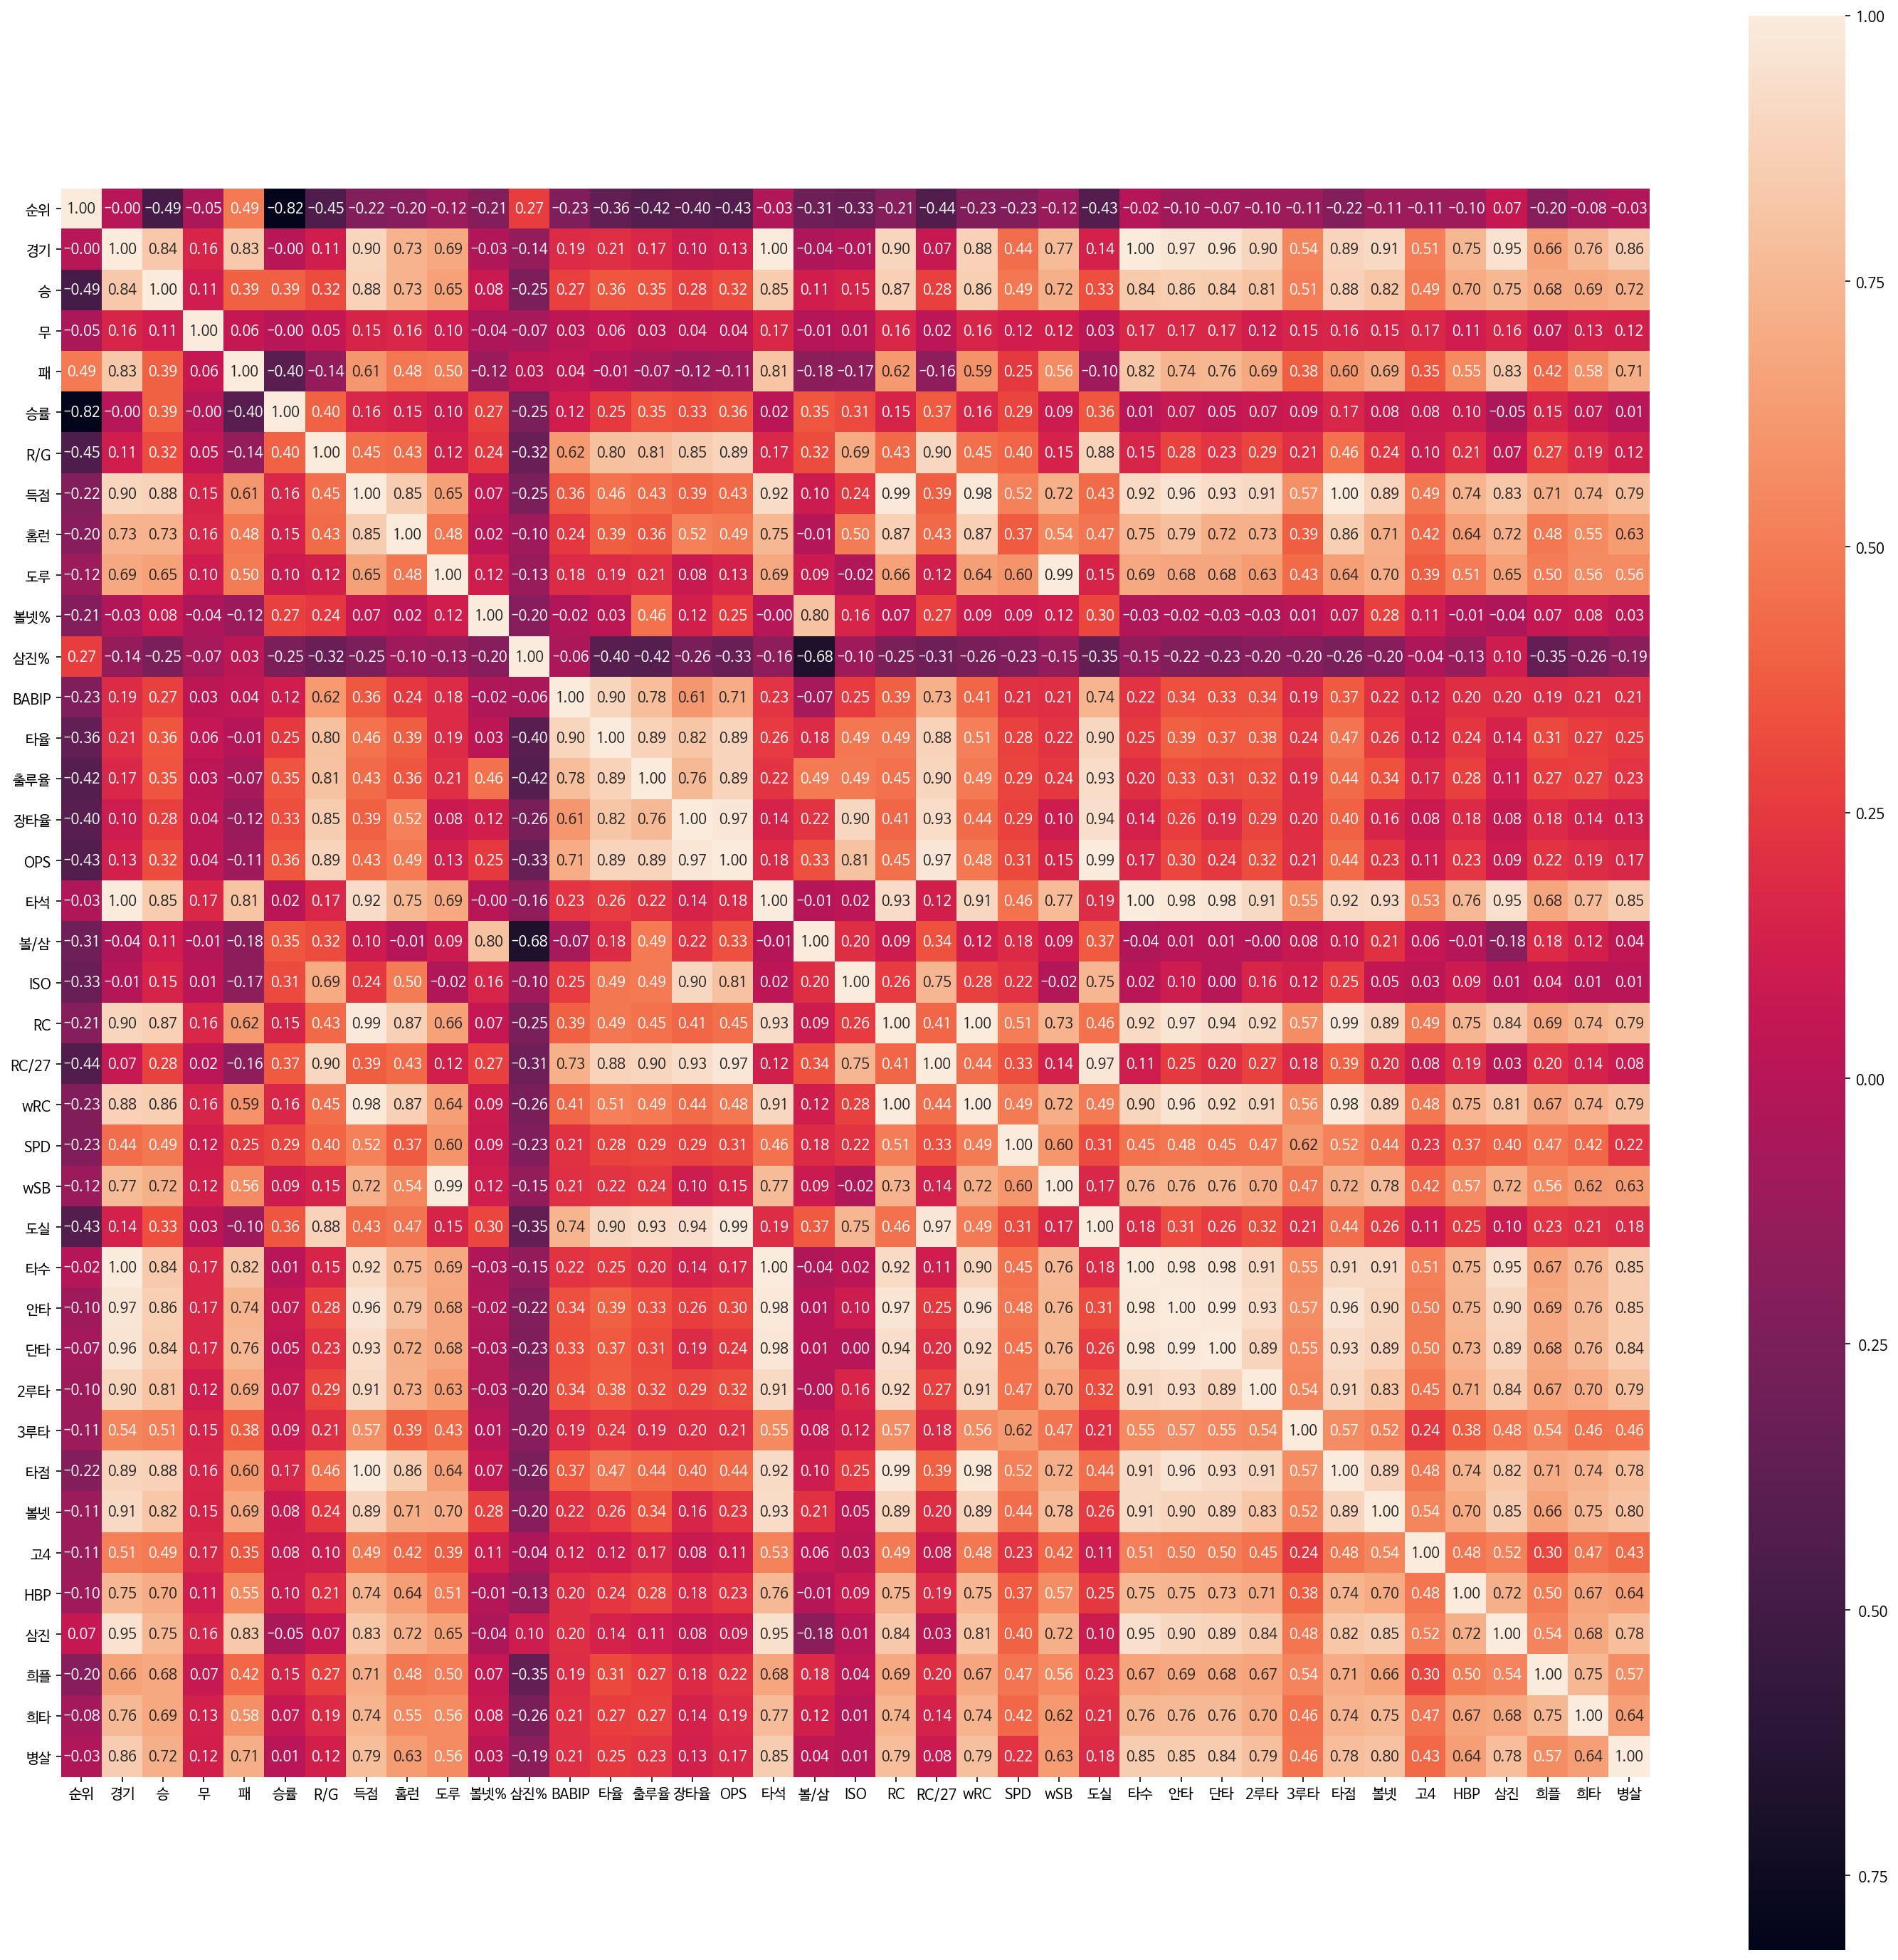

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(corr_tmp, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=tmp.columns, xticklabels=tmp.columns)
plt.show()

In [ ]:
corr_tmp[5]

array([-8.19983120e-01, -2.10791470e-03,  3.94359340e-01, -2.42237323e-05,
       -3.99110409e-01,  1.00000000e+00,  3.99074933e-01,  1.63034930e-01,
        1.46800242e-01,  9.64415458e-02,  2.74686725e-01, -2.46355294e-01,
        1.16584749e-01,  2.48650627e-01,  3.52158655e-01,  3.29932573e-01,
        3.57000906e-01,  1.73062416e-02,  3.54362727e-01,  3.12724214e-01,
        1.48670887e-01,  3.72958101e-01,  1.64187451e-01,  2.91068403e-01,
        9.48383677e-02,  3.57702644e-01,  6.98552338e-03,  6.97567329e-02,
        4.73420868e-02,  7.45537550e-02,  8.86667020e-02,  1.65526641e-01,
        8.00280260e-02,  8.38962057e-02,  9.59085451e-02, -5.44124545e-02,
        1.48115674e-01,  7.24543419e-02,  1.08241217e-02])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


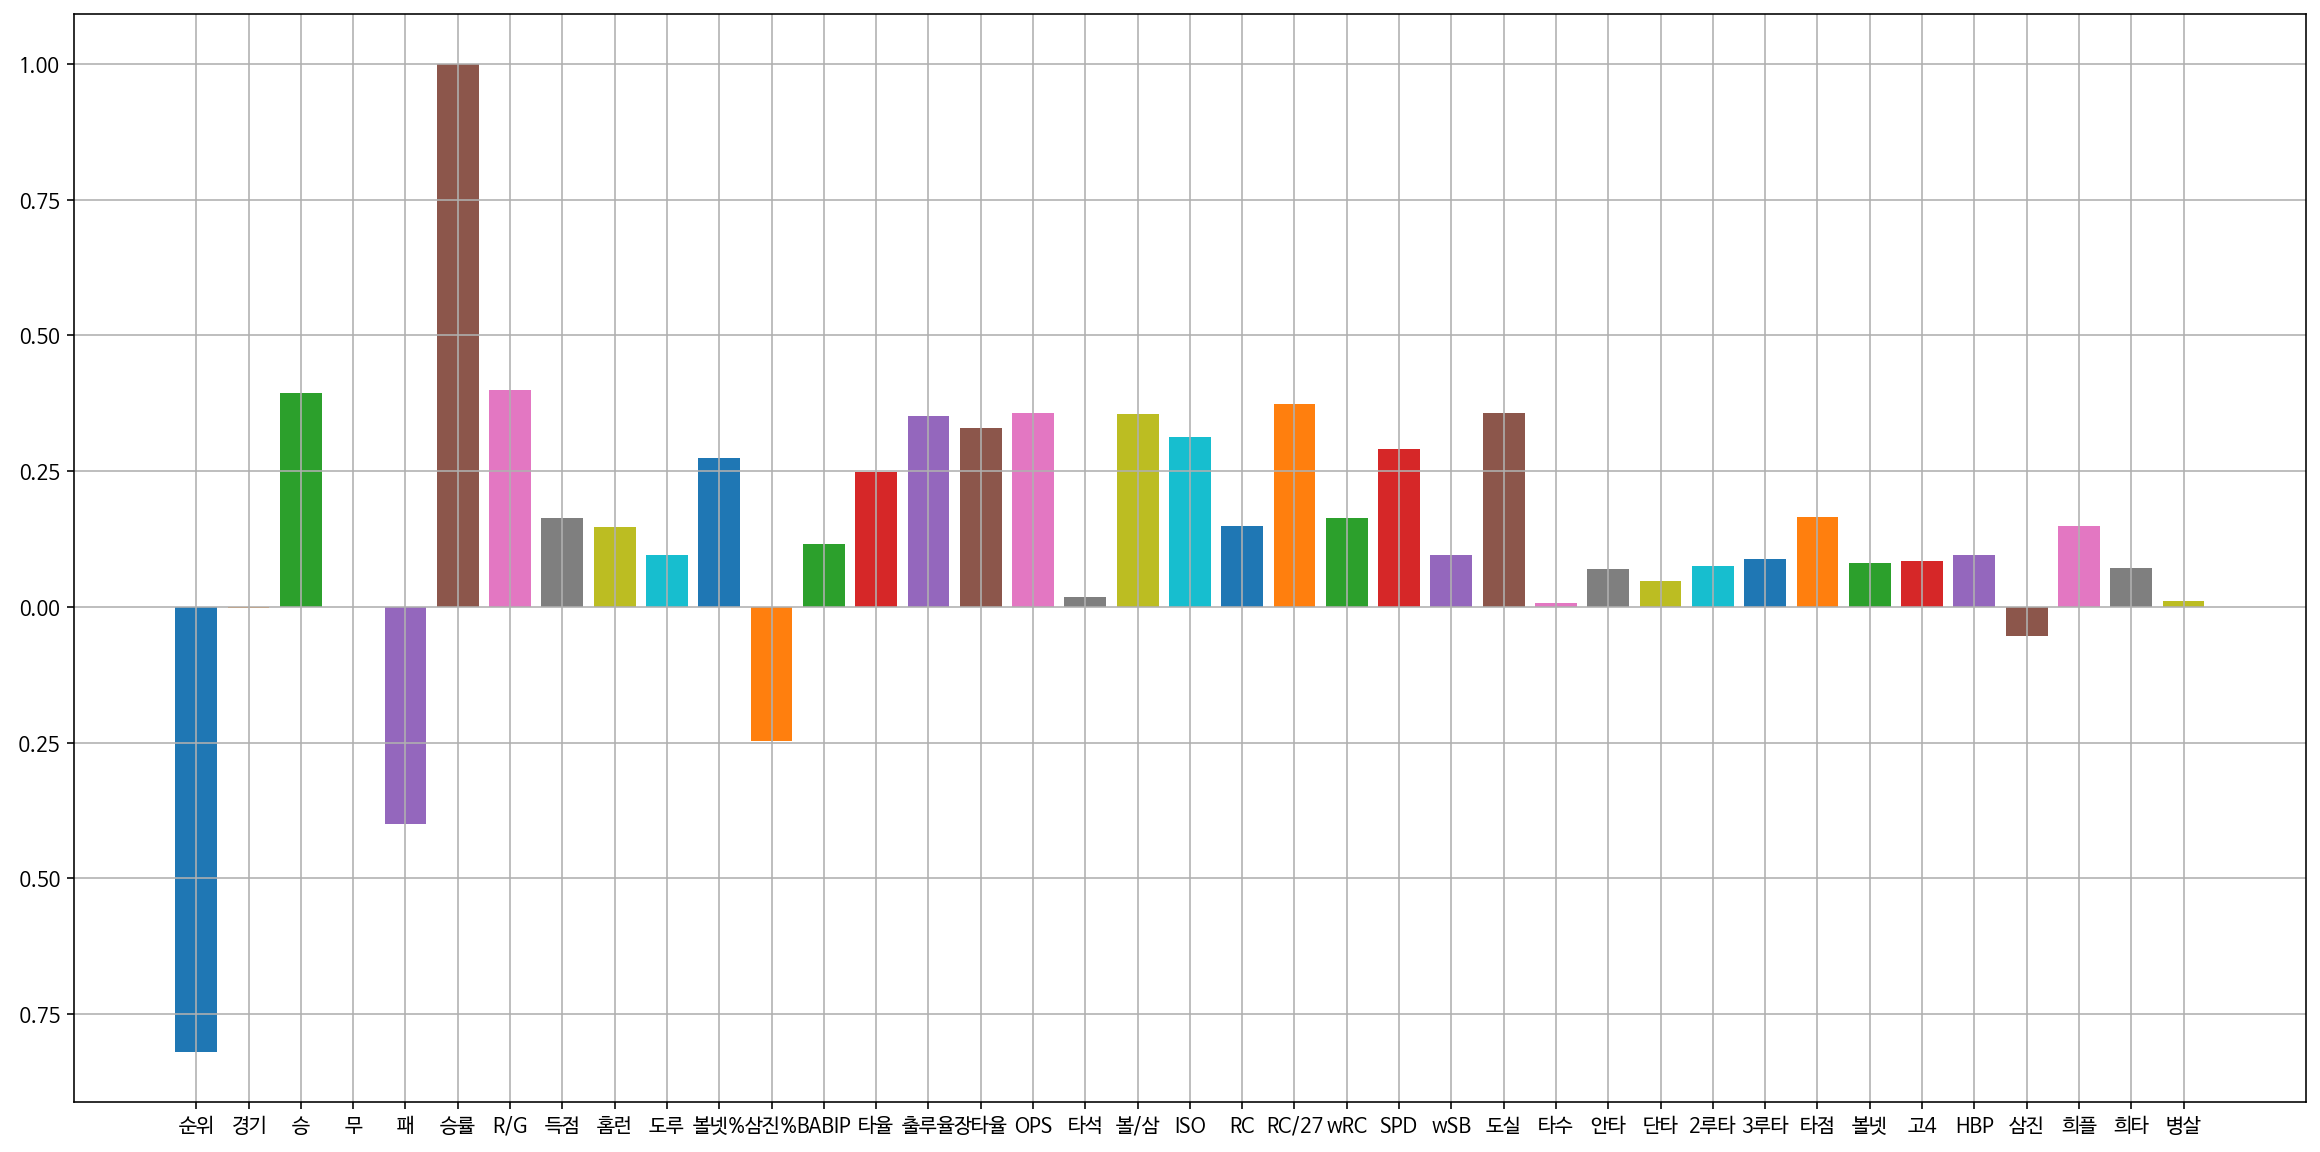

In [ ]:
plt.figure(figsize=(20,10))
plt.grid()
for i in range(0,len(tmp.columns)):
  plt.bar(tmp.columns[i],corr_tmp[5][i])
plt.show()

In [ ]:
np.abs(corr_tmp[5])>=0.3

array([ True, False,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
tmp.columns[np.abs(corr_tmp[5])>=0.3]

Index(['순위', '승', '패', '승률', 'R/G', '출루율', '장타율', 'OPS', '볼/삼', 'ISO', 'RC/27',
       '도실'],
      dtype='object')

In [ ]:
# 최종 요소
cols = tmp.columns[np.abs(corr_tmp[5])>=0.3]
cols = list(cols.drop(['순위', '승', '패', '승률']))
cols

['R/G', '출루율', '장타율', 'OPS', '볼/삼', 'ISO', 'RC/27', '도실']

In [ ]:
re_hit_final = re_hit_all[['연도','월', '팀명'] + cols]
re_hit_final.head()

,연도,월,팀명,R/G,출루율,장타율,OPS,볼/삼,ISO,RC/27,도실
0,2015,3,롯데,8.00,0.415,0.525,0.940,0.61,0.222,8.48,0.413
1,2015,3,두산,6.50,0.352,0.516,0.868,1.20,0.219,6.44,0.372
2,2015,3,KIA,5.00,0.380,0.550,0.930,1.29,0.267,7.82,0.402
3,2015,3,삼성,5.67,0.379,0.469,0.848,0.67,0.150,7.36,0.379
4,2015,3,한화,4.50,0.385,0.351,0.736,0.81,0.094,5.18,0.348


In [ ]:
re_hit_final.to_csv(path+'/성훈s/kbreport_hit_final.csv', sep=',', encoding='cp949')

In [ ]:
target_df = re_hit_all.iloc[:,9:]
target_df.drop(['장타율', '출루율'], axis=1, inplace=True)
y_data = re_hit_all['승률']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(target_df, y_data, train_size=0.7,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((287, 31), (123, 31), (287,), (123,))

In [ ]:
X_train_added = sm.add_constant(X_train)
full_model = sm.OLS(y_train, X_train_added)
full_model_res = full_model.fit()

In [ ]:
print(full_model_res.summary())

                            OLS Regression Results                            
Dep. Variable:                     승률   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     5.062
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           1.24e-13
Time:                        05:51:03   Log-Likelihood:                 167.70
No. Observations:                 287   AIC:                            -273.4
Df Residuals:                     256   BIC:                            -160.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0622      0.820      0.076      0.9

In [ ]:
kbo_first = pd.read_csv(path + '/현정s/csv/포지션별 상관분석 최종csv/KBO_FIRST.csv', sep=',', encoding='cp949')
kbo_first = kbo_first.drop('Unnamed: 0', axis = 1)
kbo_first = kbo_first.rename(columns=lambda x : x +'_first' if x != '연도' and x != '팀명' else x)
kbo_first.head()

,연도,팀명,득점_first
0,2015,KIA,33.333333
1,2015,KT,29.666667
2,2015,LG,25.571429
3,2015,NC,41.600000
4,2015,SK,40.250000


In [ ]:
kbo_second = pd.read_csv(path + '/현정s/csv/포지션별 상관분석 최종csv/KBO_SECOND.csv', sep=',', encoding='cp949')
kbo_second = kbo_second.drop('Unnamed: 0', axis = 1)
kbo_second = kbo_second.rename(columns=lambda x : x +'_second' if x != '연도' and x != '팀명' else x)
kbo_second.head()

,연도,팀명,병살_second,보살_second,자살_second
0,2015,KIA,17.500000,67.333333,51.000000
1,2015,KT,28.250000,98.250000,82.750000
2,2015,LG,17.428571,61.857143,43.714286
3,2015,NC,17.166667,71.166667,50.166667
4,2015,SK,16.000000,64.833333,48.333333


In [ ]:
kbo_third = pd.read_csv(path + '/현정s/csv/포지션별 상관분석 최종csv/KBO_THIRD.csv', sep=',', encoding='cp949')
kbo_third = kbo_third.drop('Unnamed: 0', axis = 1)
kbo_third = kbo_third.rename(columns=lambda x : x +'_third' if x != '연도' and x != '팀명' else x)
kbo_third.head()

,연도,팀명,희생플라이_third
0,2015,KIA,1.166667
1,2015,KT,1.600000
2,2015,LG,2.400000
3,2015,NC,1.400000
4,2015,SK,1.125000


In [ ]:
kbo_left = pd.read_csv(path + '/현정s/csv/포지션별 상관분석 최종csv/KBO_LEFT.csv', sep=',', encoding='cp949')
kbo_left = kbo_left.drop('Unnamed: 0', axis = 1)
kbo_left = kbo_left.rename(columns=lambda x : x +'_left' if x != '연도' and x != '팀명' else x)
kbo_left.head()

,연도,팀명,병살_left
0,2015,KIA,0.000000
1,2015,KT,0.000000
2,2015,LG,0.333333
3,2015,NC,0.500000
4,2015,SK,0.250000


In [ ]:
kbo_pitcher = pd.read_csv(path + '/현정s/csv/포지션별 상관분석 최종csv/KBO_PITCHER.csv', sep=',', encoding='cp949')
kbo_pitcher = kbo_pitcher.drop('Unnamed: 0', axis = 1)
kbo_pitcher = kbo_pitcher.rename(columns=lambda x : x +'_pitcher' if x != '연도' and x != '팀명' else x)
kbo_pitcher.head()

,연도,팀명,삼진_pitcher,세이브_pitcher,이닝당_출루허용률_pitcher,평균자책점_pitcher,홀드_pitcher
0,2015,KIA,54.294118,1.882353,1.573529,5.178824,3.647059
1,2015,KT,49.526316,0.842105,1.658421,5.610000,1.631579
2,2015,LG,61.875000,1.562500,1.443125,4.801875,2.687500
3,2015,NC,64.187500,2.312500,1.475000,4.696250,3.187500
4,2015,SK,66.352941,1.823529,1.508235,4.798235,3.470588


In [ ]:
kbo_short = pd.read_csv(path + '/현정s/csv/포지션별 상관분석 최종csv/KBO_SHORT.csv', sep=',', encoding='cp949')
kbo_short = kbo_short.drop('Unnamed: 0', axis = 1)
kbo_short = kbo_short.rename(columns=lambda x : x +'_pitcher' if x != '연도' and x != '팀명' else x)
kbo_short.head()

,연도,팀명,타점_pitcher
0,2015,KIA,10.800000
1,2015,KT,15.666667
2,2015,LG,19.666667
3,2015,NC,35.333333
4,2015,SK,21.750000


In [ ]:
kbo_catcher = pd.read_csv(path + '/현정s/csv/포지션별 상관분석 최종csv/KBO_CATCHER.csv', sep=',', encoding='cp949')
kbo_catcher = kbo_catcher.drop('Unnamed: 0', axis = 1)
kbo_catcher = kbo_catcher.rename(columns=lambda x : x +'_catcher' if x != '연도' and x != '팀명' else x)
kbo_catcher.head()

,연도,팀명,득점_catcher,루타_catcher,안타_catcher,타율_catcher,타점_catcher,희생플라이_catcher
0,2015,KIA,13.750000,52.250000,28.500000,0.211500,21.750000,1.500000
1,2015,KT,24.666667,87.000000,56.333333,0.255667,35.333333,3.666667
2,2015,LG,24.500000,84.500000,57.000000,0.240000,28.000000,1.000000
3,2015,NC,19.666667,66.333333,49.000000,0.261000,22.666667,2.666667
4,2015,SK,24.500000,84.750000,54.500000,0.249250,38.000000,1.250000


In [ ]:
tmp = pd.merge(rank,tm_hit,on=['연도', '팀명'])
tmp = tmp.drop(columns=['연도', '팀명', '팀승', '팀패', '팀무'])
corr_tmp = np.corrcoef(tmp.values.T)
cols = list(tmp.columns[np.abs(corr_tmp[0]) < 0.3])
kbo_hitter = tm_hit.drop(columns=cols)
kbo_hitter = kbo_hitter.rename(columns=lambda x : x +'_hitter' if x != '연도' and x != '팀명' else x)
kbo_hitter.head()

,연도,팀명,타율_hitter,희생플라이_hitter,장타율_hitter,출루율_hitter,OPS_hitter,득점권타율_hitter
114,2015,삼성,0.302,57,0.469,0.378,0.847,0.311
115,2015,넥센,0.298,55,0.486,0.372,0.858,0.298
116,2015,두산,0.290,60,0.435,0.370,0.805,0.287
117,2015,NC,0.289,53,0.455,0.367,0.822,0.293
118,2015,롯데,0.280,28,0.446,0.356,0.802,0.274


# KBO 데이터


In [ ]:
kbo = pd.merge(rank, kbo_first, on=['연도', '팀명'])
kbo = pd.merge(kbo, kbo_second, on=['연도', '팀명'])
kbo = pd.merge(kbo, kbo_third, on=['연도', '팀명'])
kbo = pd.merge(kbo, kbo_left, on=['연도', '팀명'])
kbo = pd.merge(kbo, kbo_pitcher, on=['연도', '팀명'])
kbo = pd.merge(kbo, kbo_short, on=['연도', '팀명'])
kbo = pd.merge(kbo, kbo_catcher, on=['연도', '팀명'])
kbo = pd.merge(kbo, kbo_hitter, on=['연도', '팀명'])
kbo.head()

,연도,팀명,순위,팀승,팀무,팀패,승률,기대승률,득점_first,병살_second,보살_second,자살_second,희생플라이_third,병살_left,삼진_pitcher,세이브_pitcher,이닝당_출루허용률_pitcher,평균자책점_pitcher,홀드_pitcher,타점_pitcher,득점_catcher,루타_catcher,안타_catcher,타율_catcher,타점_catcher,희생플라이_catcher,타율_hitter,희생플라이_hitter,장타율_hitter,출루율_hitter,OPS_hitter,득점권타율_hitter
0,2015,삼성,1,88,0,56,0.611,0.601,46.200000,13.833333,59.000000,49.500000,2.600000,0.000000,84.461538,2.615385,1.464615,4.979231,4.384615,68.333333,15.000000,48.750000,39.75,0.31675,20.500000,1.500000,0.302,57,0.469,0.378,0.847,0.311
1,2015,NC,2,84,3,57,0.596,0.613,41.600000,17.166667,71.166667,50.166667,1.400000,0.500000,64.187500,2.312500,1.475000,4.696250,3.187500,35.333333,19.666667,66.333333,49.00,0.26100,22.666667,2.666667,0.289,53,0.455,0.367,0.822,0.293
2,2015,두산,3,79,0,65,0.549,0.518,29.714286,17.833333,65.166667,54.166667,2.000000,0.000000,60.235294,1.764706,1.636471,5.338824,3.352941,23.250000,38.000000,124.500000,79.50,0.23900,50.000000,3.500000,0.290,60,0.435,0.370,0.805,0.287
3,2015,SK,5,69,2,73,0.486,0.480,40.250000,16.000000,64.833333,48.333333,1.125000,0.250000,66.352941,1.823529,1.508235,4.798235,3.470588,21.750000,24.500000,84.750000,54.50,0.24925,38.000000,1.250000,0.272,29,0.410,0.349,0.759,0.280
4,2015,한화,6,68,0,76,0.472,0.450,39.833333,34.333333,147.000000,107.666667,0.833333,0.142857,55.250000,2.000000,1.595625,4.896875,2.812500,19.000000,11.250000,38.250000,24.00,0.19825,15.000000,0.500000,0.271,35,0.404,0.360,0.764,0.269


In [ ]:
kbo.drop(['홀드_pitcher', '세이브_pitcher', '타점_pitcher', '장타율_hitter', '출루율_hitter'], axis=1, inplace=True)
kbo.head(3)

# 상관없는 / 다중공선성이 높을 인자 제거

,연도,팀명,순위,팀승,팀무,팀패,승률,기대승률,득점_first,병살_second,보살_second,자살_second,희생플라이_third,병살_left,삼진_pitcher,이닝당_출루허용률_pitcher,평균자책점_pitcher,득점_catcher,루타_catcher,안타_catcher,타율_catcher,타점_catcher,희생플라이_catcher,타율_hitter,희생플라이_hitter,OPS_hitter,득점권타율_hitter
0,2015,삼성,1,88,0,56,0.611,0.601,46.200000,13.833333,59.000000,49.500000,2.6,0.0,84.461538,1.464615,4.979231,15.000000,48.750000,39.75,0.31675,20.500000,1.500000,0.302,57,0.847,0.311
1,2015,NC,2,84,3,57,0.596,0.613,41.600000,17.166667,71.166667,50.166667,1.4,0.5,64.187500,1.475000,4.696250,19.666667,66.333333,49.00,0.26100,22.666667,2.666667,0.289,53,0.822,0.293
2,2015,두산,3,79,0,65,0.549,0.518,29.714286,17.833333,65.166667,54.166667,2.0,0.0,60.235294,1.636471,5.338824,38.000000,124.500000,79.50,0.23900,50.000000,3.500000,0.290,60,0.805,0.287


In [ ]:
target_df = kbo.iloc[:,8:]
y_data = kbo['승률']
X_train, X_test = target_df[kbo['연도'] < 2019], target_df[kbo['연도'] == 2019]
y_train, y_test = kbo['승률'][kbo['연도'] < 2019], kbo['승률'][kbo['연도'] == 2019]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36, 19), (10, 19), (36,), (10,))

In [ ]:
X_train_added = sm.add_constant(X_train)
X_train_added[:2]

,const,득점_first,병살_second,보살_second,자살_second,희생플라이_third,병살_left,삼진_pitcher,이닝당_출루허용률_pitcher,평균자책점_pitcher,득점_catcher,루타_catcher,안타_catcher,타율_catcher,타점_catcher,희생플라이_catcher,타율_hitter,희생플라이_hitter,OPS_hitter,득점권타율_hitter
0,1.0,46.2,13.833333,59.000000,49.500000,2.6,0.0,84.461538,1.464615,4.979231,15.000000,48.750000,39.75,0.31675,20.500000,1.500000,0.302,57,0.847,0.311
1,1.0,41.6,17.166667,71.166667,50.166667,1.4,0.5,64.187500,1.475000,4.696250,19.666667,66.333333,49.00,0.26100,22.666667,2.666667,0.289,53,0.822,0.293


In [ ]:
columns = target_df.columns

print(f'{"제거된 컬럼":15} {"R제곱값":20} {"다중공선성":20}')
print("="*77)
for idx in range(len(columns)) :
  tmp = list(columns)
  rm_col = tmp.pop(idx)
  m_model = sm.OLS(y_train, sm.add_constant(X_train[tmp]))
  m_model_res = m_model.fit()
  vif = 1/(1-m_model_res.rsquared)
  print(f'{rm_col:15} {m_model_res.rsquared:20} {vif:20}')

제거된 컬럼          R제곱값                 다중공선성               
득점_first          0.8877562030863587     8.90917830202577
병살_second         0.8955316148209174    9.572273930393123
보살_second         0.8950437860327026    9.527782702904885
자살_second         0.8957473745453439    9.592084569946325
희생플라이_third       0.8913047831214488    9.200036843546973
병살_left           0.8876689312547263    8.902256616712508
삼진_pitcher        0.8955569595390716    9.574596790621912
이닝당_출루허용률_pitcher   0.8918316175687043    9.244845651964528
평균자책점_pitcher      0.837610441869661    6.158031412323744
득점_catcher        0.8912609747013082     9.19633036302405
루타_catcher        0.8953546939026258    9.556090352198725
안타_catcher        0.8940652926022034    9.439776864110158
타율_catcher        0.8867329747833418    8.828694830531576
타점_catcher        0.8927401411002709     9.32315229814763
희생플라이_catcher      0.894733565360281    9.499704282970761
타율_hitter         0.8752805551376663    8.017995919592234
희생플라이_hitter

In [ ]:
full_model = sm.OLS(y_train, X_train_added)
full_model_res = full_model.fit()
print(full_model_res.summary())

                            OLS Regression Results                            
Dep. Variable:                     승률   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     7.236
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           0.000109
Time:                        05:52:03   Log-Likelihood:                 82.214
No. Observations:                  36   AIC:                            -124.4
Df Residuals:                      16   BIC:                            -92.76
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1546      0.26

In [ ]:
kbo.drop(['자살_second', '병살_second', '삼진_pitcher', '루타_catcher'], axis=1, inplace=True)
kbo.head(3)

,연도,팀명,순위,팀승,팀무,팀패,승률,기대승률,득점_first,보살_second,희생플라이_third,병살_left,이닝당_출루허용률_pitcher,평균자책점_pitcher,득점_catcher,안타_catcher,타율_catcher,타점_catcher,희생플라이_catcher,타율_hitter,희생플라이_hitter,OPS_hitter,득점권타율_hitter
0,2015,삼성,1,88,0,56,0.611,0.601,46.200000,59.000000,2.6,0.0,1.464615,4.979231,15.000000,39.75,0.31675,20.500000,1.500000,0.302,57,0.847,0.311
1,2015,NC,2,84,3,57,0.596,0.613,41.600000,71.166667,1.4,0.5,1.475000,4.696250,19.666667,49.00,0.26100,22.666667,2.666667,0.289,53,0.822,0.293
2,2015,두산,3,79,0,65,0.549,0.518,29.714286,65.166667,2.0,0.0,1.636471,5.338824,38.000000,79.50,0.23900,50.000000,3.500000,0.290,60,0.805,0.287


In [ ]:
target_df = kbo.iloc[:,8:]
y_data = kbo['승률']
X_train, X_test = target_df[kbo['연도'] < 2019], target_df[kbo['연도'] == 2019]
y_train, y_test = kbo['승률'][kbo['연도'] < 2019], kbo['승률'][kbo['연도'] == 2019]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36, 15), (10, 15), (36,), (10,))

In [ ]:
X_train_added = sm.add_constant(X_train)
X_train_added[:2]

,const,득점_first,보살_second,희생플라이_third,병살_left,이닝당_출루허용률_pitcher,평균자책점_pitcher,득점_catcher,안타_catcher,타율_catcher,타점_catcher,희생플라이_catcher,타율_hitter,희생플라이_hitter,OPS_hitter,득점권타율_hitter
0,1.0,46.2,59.000000,2.6,0.0,1.464615,4.979231,15.000000,39.75,0.31675,20.500000,1.500000,0.302,57,0.847,0.311
1,1.0,41.6,71.166667,1.4,0.5,1.475000,4.696250,19.666667,49.00,0.26100,22.666667,2.666667,0.289,53,0.822,0.293


In [ ]:
columns = target_df.columns

print(f'{"제거된 컬럼":15} {"R제곱값":20} {"다중공선성":20}')
print("="*77)
for idx in range(len(columns)) :
  tmp = list(columns)
  rm_col = tmp.pop(idx)
  m_model = sm.OLS(y_train, sm.add_constant(X_train[tmp]))
  m_model_res = m_model.fit()
  vif = 1/(1-m_model_res.rsquared)
  print(f'{rm_col:15} {m_model_res.rsquared:20} {vif:20}')

제거된 컬럼          R제곱값                 다중공선성               
득점_first           0.886858925750243     8.83852311489033
보살_second         0.8924406961492258    9.297196655227351
희생플라이_third       0.8898551290351837    9.078952031451662
병살_left           0.8857379834829676    8.751814736710303
이닝당_출루허용률_pitcher   0.8880579463323001    8.933193265941865
평균자책점_pitcher     0.8253190878209782    5.724723941074624
득점_catcher        0.8855952778546491    8.740897938893664
안타_catcher        0.8930824786492081    9.353003954506594
타율_catcher        0.8807369670240763    8.384827846880901
타점_catcher        0.8799847158653609    8.332272070265235
희생플라이_catcher      0.893987551929005    9.432854520351372
타율_hitter         0.8749831938846251    7.998924553208669
희생플라이_hitter      0.8783260583313302    8.218686649628715
OPS_hitter        0.8320483297724688    5.954093809518285
득점권타율_hitter      0.8673667273515673    7.539586259404696


In [ ]:
full_model = sm.OLS(y_train, X_train_added)
full_model_res = full_model.fit()
print(full_model_res.summary())

                            OLS Regression Results                            
Dep. Variable:                     승률   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     11.26
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           1.16e-06
Time:                        05:53:01   Log-Likelihood:                 81.939
No. Observations:                  36   AIC:                            -131.9
Df Residuals:                      20   BIC:                            -106.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1259      0.20

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(
#     X_train.values, i) for i in range(X_train.shape[1])]
# vif["features"] = X_train.columns
# vif

,VIF Factor,features
0,28.225387,득점_first
1,21.319386,보살_second
2,14.083132,희생플라이_third
3,2.251370,병살_left
4,2167.961938,이닝당_출루허용률_pitcher
5,1158.074949,평균자책점_pitcher
6,83.510608,득점_catcher
7,144.273032,안타_catcher
8,78.036098,타율_catcher
9,50.528249,타점_catcher


In [ ]:
# kbo.drop(['OPS_hitter'], axis=1, inplace=True)
# kbo.head(3)

# # VIF Factor 높은 인자 제거

,연도,팀명,순위,팀승,팀무,팀패,승률,기대승률,득점_first,병살_second,보살_second,자살_second,희생플라이_third,병살_left,이닝당_출루허용률_pitcher,평균자책점_pitcher,득점_catcher,안타_catcher,타율_catcher,희생플라이_catcher,득점권타율_hitter
0,2015,삼성,1,88,0,56,0.611,0.601,46.200000,13.833333,59.000000,49.500000,2.6,0.0,1.464615,4.979231,15.000000,39.75,0.31675,1.500000,0.311
1,2015,NC,2,84,3,57,0.596,0.613,41.600000,17.166667,71.166667,50.166667,1.4,0.5,1.475000,4.696250,19.666667,49.00,0.26100,2.666667,0.293
2,2015,두산,3,79,0,65,0.549,0.518,29.714286,17.833333,65.166667,54.166667,2.0,0.0,1.636471,5.338824,38.000000,79.50,0.23900,3.500000,0.287


In [ ]:
# target_df = kbo.iloc[:,8:]
# y_data = kbo['승률']
# X_train, X_test = target_df[kbo['연도'] < 2019], target_df[kbo['연도'] == 2019]
# y_train, y_test = kbo['승률'][kbo['연도'] < 2019], kbo['승률'][kbo['연도'] == 2019]
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36, 13), (10, 13), (36,), (10,))

In [ ]:
# X_train_added = sm.add_constant(X_train)
# X_train_added[:2]

,const,득점_first,병살_second,보살_second,자살_second,희생플라이_third,병살_left,이닝당_출루허용률_pitcher,평균자책점_pitcher,득점_catcher,안타_catcher,타율_catcher,희생플라이_catcher,득점권타율_hitter
0,1.0,46.2,13.833333,59.000000,49.500000,2.6,0.0,1.464615,4.979231,15.000000,39.75,0.31675,1.500000,0.311
1,1.0,41.6,17.166667,71.166667,50.166667,1.4,0.5,1.475000,4.696250,19.666667,49.00,0.26100,2.666667,0.293


In [ ]:
# columns = target_df.columns

# print(f'{"제거된 컬럼":15} {"R제곱값":20} {"다중공선성":20}')
# print("="*77)
# for idx in range(len(columns)) :
#   tmp = list(columns)
#   rm_col = tmp.pop(idx)
#   m_model = sm.OLS(y_train, sm.add_constant(X_train[tmp]))
#   m_model_res = m_model.fit()
#   vif = 1/(1-m_model_res.rsquared)
#   print(f'{rm_col:15} {m_model_res.rsquared:20} {vif:20}')

제거된 컬럼          R제곱값                 다중공선성               
득점_first          0.8011883066861812    5.029885231255124
병살_second         0.8040750247841327    5.103994520852764
보살_second         0.8048876521439448    5.125252250758384
자살_second         0.7976228696979802   4.9412697892673885
희생플라이_third       0.8022155015012032    5.056007966196014
병살_left           0.7969516138874536    4.924934490470249
이닝당_출루허용률_pitcher    0.797291463054892    4.933191344924918
평균자책점_pitcher     0.7107448492737782    3.457155378181991
득점_catcher        0.7832784299824436     4.61421537283525
안타_catcher         0.791672352477185    4.800131004649708
타율_catcher        0.8028006333418765    5.071010201232841
희생플라이_catcher     0.8043079393667295    5.110069344478993
득점권타율_hitter      0.6480104551017414   2.8409934740790286


In [ ]:
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(
#     X_train.values, i) for i in range(X_train.shape[1])]
# vif["features"] = X_train.columns
# vif

,VIF Factor,features
0,22.062774,득점_first
1,339.894046,병살_second
2,297.730323,보살_second
3,253.620205,자살_second
4,12.697371,희생플라이_third
5,2.460855,병살_left
6,947.684392,이닝당_출루허용률_pitcher
7,763.077332,평균자책점_pitcher
8,73.586429,득점_catcher
9,86.544257,안타_catcher


In [ ]:
# # kbo.drop(['타석_hitter', '득점_hitter'], axis=1, inplace=True)
# kbo.head(3)

,연도,팀명,순위,팀승,팀무,팀패,승률,기대승률,득점_first,병살_second,보살_second,자살_second,희생플라이_third,병살_left,이닝당_출루허용률_pitcher,평균자책점_pitcher,득점_catcher,안타_catcher,타율_catcher,희생플라이_catcher,득점권타율_hitter
0,2015,삼성,1,88,0,56,0.611,0.601,46.200000,13.833333,59.000000,49.500000,2.6,0.0,1.464615,4.979231,15.000000,39.75,0.31675,1.500000,0.311
1,2015,NC,2,84,3,57,0.596,0.613,41.600000,17.166667,71.166667,50.166667,1.4,0.5,1.475000,4.696250,19.666667,49.00,0.26100,2.666667,0.293
2,2015,두산,3,79,0,65,0.549,0.518,29.714286,17.833333,65.166667,54.166667,2.0,0.0,1.636471,5.338824,38.000000,79.50,0.23900,3.500000,0.287


In [ ]:
# target_df = kbo.iloc[:,8:]
# y_data = kbo['승률']
# X_train, X_test = target_df[kbo['연도'] < 2019], target_df[kbo['연도'] == 2019]
# y_train, y_test = kbo['승률'][kbo['연도'] < 2019], kbo['승률'][kbo['연도'] == 2019]
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36, 13), (10, 13), (36,), (10,))

In [ ]:
# X_train_added = sm.add_constant(X_train)
# X_train_added[:2]

,const,득점_first,병살_second,보살_second,자살_second,희생플라이_third,병살_left,이닝당_출루허용률_pitcher,평균자책점_pitcher,득점_catcher,안타_catcher,타율_catcher,희생플라이_catcher,득점권타율_hitter
0,1.0,46.2,13.833333,59.000000,49.500000,2.6,0.0,1.464615,4.979231,15.000000,39.75,0.31675,1.500000,0.311
1,1.0,41.6,17.166667,71.166667,50.166667,1.4,0.5,1.475000,4.696250,19.666667,49.00,0.26100,2.666667,0.293


In [ ]:
# columns = target_df.columns

# print(f'{"제거된 컬럼":15} {"R제곱값":20} {"다중공선성":20}')
# print("="*77)
# for idx in range(len(columns)) :
#   tmp = list(columns)
#   rm_col = tmp.pop(idx)
#   m_model = sm.OLS(y_train, sm.add_constant(X_train[tmp]))
#   m_model_res = m_model.fit()
#   vif = 1/(1-m_model_res.rsquared)
#   print(f'{rm_col:15} {m_model_res.rsquared:20} {vif:20}')

제거된 컬럼          R제곱값                 다중공선성               
득점_first          0.8011883066861812    5.029885231255124
병살_second         0.8040750247841327    5.103994520852764
보살_second         0.8048876521439448    5.125252250758384
자살_second         0.7976228696979802   4.9412697892673885
희생플라이_third       0.8022155015012032    5.056007966196014
병살_left           0.7969516138874536    4.924934490470249
이닝당_출루허용률_pitcher    0.797291463054892    4.933191344924918
평균자책점_pitcher     0.7107448492737782    3.457155378181991
득점_catcher        0.7832784299824436     4.61421537283525
안타_catcher         0.791672352477185    4.800131004649708
타율_catcher        0.8028006333418765    5.071010201232841
희생플라이_catcher     0.8043079393667295    5.110069344478993
득점권타율_hitter      0.6480104551017414   2.8409934740790286


In [ ]:
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(
#     X_train.values, i) for i in range(X_train.shape[1])]
# vif["features"] = X_train.columns
# vif

,VIF Factor,features
0,22.062774,득점_first
1,339.894046,병살_second
2,297.730323,보살_second
3,253.620205,자살_second
4,12.697371,희생플라이_third
5,2.460855,병살_left
6,947.684392,이닝당_출루허용률_pitcher
7,763.077332,평균자책점_pitcher
8,73.586429,득점_catcher
9,86.544257,안타_catcher


### ↑ 다중공선성 10 이하

### ↓ 포지션 제거

In [ ]:
kbo.head()

,연도,팀명,순위,팀승,팀무,팀패,승률,기대승률,득점_first,보살_second,희생플라이_third,병살_left,이닝당_출루허용률_pitcher,평균자책점_pitcher,득점_catcher,안타_catcher,타율_catcher,타점_catcher,희생플라이_catcher,타율_hitter,희생플라이_hitter,OPS_hitter,득점권타율_hitter
0,2015,삼성,1,88,0,56,0.611,0.601,46.200000,59.000000,2.600000,0.000000,1.464615,4.979231,15.000000,39.75,0.31675,20.500000,1.500000,0.302,57,0.847,0.311
1,2015,NC,2,84,3,57,0.596,0.613,41.600000,71.166667,1.400000,0.500000,1.475000,4.696250,19.666667,49.00,0.26100,22.666667,2.666667,0.289,53,0.822,0.293
2,2015,두산,3,79,0,65,0.549,0.518,29.714286,65.166667,2.000000,0.000000,1.636471,5.338824,38.000000,79.50,0.23900,50.000000,3.500000,0.290,60,0.805,0.287
3,2015,SK,5,69,2,73,0.486,0.480,40.250000,64.833333,1.125000,0.250000,1.508235,4.798235,24.500000,54.50,0.24925,38.000000,1.250000,0.272,29,0.759,0.280
4,2015,한화,6,68,0,76,0.472,0.450,39.833333,147.000000,0.833333,0.142857,1.595625,4.896875,11.250000,24.00,0.19825,15.000000,0.500000,0.271,35,0.764,0.269


In [ ]:
kbo1 = kbo.drop(['득점_first', '보살_second', '희생플라이_third', '병살_left', '득점_catcher', '안타_catcher', '타율_catcher', '타점_catcher', '희생플라이_catcher'], axis=1)
kbo1.head(3)

,연도,팀명,순위,팀승,팀무,팀패,승률,기대승률,이닝당_출루허용률_pitcher,평균자책점_pitcher,타율_hitter,희생플라이_hitter,OPS_hitter,득점권타율_hitter
0,2015,삼성,1,88,0,56,0.611,0.601,1.464615,4.979231,0.302,57,0.847,0.311
1,2015,NC,2,84,3,57,0.596,0.613,1.475000,4.696250,0.289,53,0.822,0.293
2,2015,두산,3,79,0,65,0.549,0.518,1.636471,5.338824,0.290,60,0.805,0.287


In [ ]:
target_df = kbo1.iloc[:,8:]
y_data = kbo1['승률']
X_train, X_test = target_df[kbo1['연도'] < 2019], target_df[kbo1['연도'] == 2019]
y_train, y_test = kbo1['승률'][kbo1['연도'] < 2019], kbo1['승률'][kbo1['연도'] == 2019]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36, 6), (10, 6), (36,), (10,))

In [ ]:
columns = target_df.columns

print(f'{"제거된 컬럼":15} {"R제곱값":20} {"다중공선성":20}')
print("="*77)
for idx in range(len(columns)) :
  tmp = list(columns)
  rm_col = tmp.pop(idx)
  m_model = sm.OLS(y_train, sm.add_constant(X_train[tmp]))
  m_model_res = m_model.fit()
  vif = 1/(1-m_model_res.rsquared)
  print(f'{rm_col:15} {m_model_res.rsquared:20} {vif:20}')

제거된 컬럼          R제곱값                 다중공선성               
이닝당_출루허용률_pitcher   0.8505708969570835    6.692136803583685
평균자책점_pitcher      0.760507517489782    4.175496406060823
타율_hitter         0.8433291687526318    6.382809052829341
희생플라이_hitter      0.8345780705244201    6.045147721164885
OPS_hitter        0.7553429893012555    4.087354771252961
득점권타율_hitter      0.8375262032101192     6.15483862479837


In [ ]:
X_train_added = sm.add_constant(X_train)
X_train_added[:2]

,const,이닝당_출루허용률_pitcher,평균자책점_pitcher,타율_hitter,희생플라이_hitter,OPS_hitter,득점권타율_hitter
0,1.0,1.464615,4.979231,0.302,57,0.847,0.311
1,1.0,1.475000,4.696250,0.289,53,0.822,0.293


In [ ]:
full_model = sm.OLS(y_train, X_train_added)
full_model_res = full_model.fit()
print(full_model_res.summary())

                            OLS Regression Results                            
Dep. Variable:                     승률   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     27.97
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           8.31e-11
Time:                        05:55:20   Log-Likelihood:                 75.984
No. Observations:                  36   AIC:                            -138.0
Df Residuals:                      29   BIC:                            -126.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0750      0.17

# 시계열 2019

In [ ]:
target_df = kbo.iloc[:,8:]
y_data = kbo['승률']
X_train, X_test = target_df[kbo['연도'] < 2019], target_df[kbo['연도'] == 2019]
y_train, y_test = kbo['승률'][kbo['연도'] < 2019], kbo['승률'][kbo['연도'] == 2019]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36, 15), (10, 15), (36,), (10,))

In [ ]:
kbo.head(3)

,연도,팀명,순위,팀승,팀무,팀패,승률,기대승률,득점_first,보살_second,희생플라이_third,병살_left,이닝당_출루허용률_pitcher,평균자책점_pitcher,득점_catcher,안타_catcher,타율_catcher,타점_catcher,희생플라이_catcher,타율_hitter,희생플라이_hitter,OPS_hitter,득점권타율_hitter
0,2015,삼성,1,88,0,56,0.611,0.601,46.200000,59.000000,2.6,0.0,1.464615,4.979231,15.000000,39.75,0.31675,20.500000,1.500000,0.302,57,0.847,0.311
1,2015,NC,2,84,3,57,0.596,0.613,41.600000,71.166667,1.4,0.5,1.475000,4.696250,19.666667,49.00,0.26100,22.666667,2.666667,0.289,53,0.822,0.293
2,2015,두산,3,79,0,65,0.549,0.518,29.714286,65.166667,2.0,0.0,1.636471,5.338824,38.000000,79.50,0.23900,50.000000,3.500000,0.290,60,0.805,0.287


In [ ]:
kbo1.head(3)

,연도,팀명,순위,팀승,팀무,팀패,승률,기대승률,이닝당_출루허용률_pitcher,평균자책점_pitcher,타율_hitter,희생플라이_hitter,OPS_hitter,득점권타율_hitter
0,2015,삼성,1,88,0,56,0.611,0.601,1.464615,4.979231,0.302,57,0.847,0.311
1,2015,NC,2,84,3,57,0.596,0.613,1.475000,4.696250,0.289,53,0.822,0.293
2,2015,두산,3,79,0,65,0.549,0.518,1.636471,5.338824,0.290,60,0.805,0.287


In [ ]:
X_train_added = sm.add_constant(X_train)
X_train_added[:2]

,const,득점_first,보살_second,희생플라이_third,병살_left,이닝당_출루허용률_pitcher,평균자책점_pitcher,득점_catcher,안타_catcher,타율_catcher,타점_catcher,희생플라이_catcher,타율_hitter,희생플라이_hitter,OPS_hitter,득점권타율_hitter
0,1.0,46.2,59.000000,2.6,0.0,1.464615,4.979231,15.000000,39.75,0.31675,20.500000,1.500000,0.302,57,0.847,0.311
1,1.0,41.6,71.166667,1.4,0.5,1.475000,4.696250,19.666667,49.00,0.26100,22.666667,2.666667,0.289,53,0.822,0.293


In [ ]:
full_model = sm.OLS(y_train, X_train_added)
full_model_res = full_model.fit()
print(full_model_res.summary())

                            OLS Regression Results                            
Dep. Variable:                     승률   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     11.26
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           1.16e-06
Time:                        05:55:29   Log-Likelihood:                 81.939
No. Observations:                  36   AIC:                            -131.9
Df Residuals:                      20   BIC:                            -106.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1259      0.20

In [ ]:
y_pred = full_model_res.predict(sm.add_constant(X_test))

In [ ]:
from sklearn.metrics import r2_score
r2_score( y_test, y_pred), full_model_res.rsquared

(0.6849965143228027, 0.8941464651427466)

In [ ]:
y_pred

36    0.684404
37    0.608099
38    0.652166
39    0.523880
40    0.598119
41    0.458267
42    0.421917
43    0.489847
44    0.418558
45    0.274321
dtype: float64

In [ ]:
y_test

36    0.615
37    0.615
38    0.601
39    0.552
40    0.514
41    0.500
42    0.437
43    0.420
44    0.403
45    0.340
Name: 승률, dtype: float64

# 시계열 최종

In [ ]:
kbo1.head()

,연도,팀명,순위,팀승,팀무,팀패,승률,기대승률,이닝당_출루허용률_pitcher,평균자책점_pitcher,타율_hitter,희생플라이_hitter,OPS_hitter,득점권타율_hitter
0,2015,삼성,1,88,0,56,0.611,0.601,1.464615,4.979231,0.302,57,0.847,0.311
1,2015,NC,2,84,3,57,0.596,0.613,1.475000,4.696250,0.289,53,0.822,0.293
2,2015,두산,3,79,0,65,0.549,0.518,1.636471,5.338824,0.290,60,0.805,0.287
3,2015,SK,5,69,2,73,0.486,0.480,1.508235,4.798235,0.272,29,0.759,0.280
4,2015,한화,6,68,0,76,0.472,0.450,1.595625,4.896875,0.271,35,0.764,0.269


In [ ]:
kbo2 = kbo1
kbo2.head()

,연도,팀명,순위,팀승,팀무,팀패,승률,기대승률,이닝당_출루허용률_pitcher,평균자책점_pitcher,타율_hitter,희생플라이_hitter,OPS_hitter,득점권타율_hitter
0,2015,삼성,1,88,0,56,0.611,0.601,1.464615,4.979231,0.302,57,0.847,0.311
1,2015,NC,2,84,3,57,0.596,0.613,1.475000,4.696250,0.289,53,0.822,0.293
2,2015,두산,3,79,0,65,0.549,0.518,1.636471,5.338824,0.290,60,0.805,0.287
3,2015,SK,5,69,2,73,0.486,0.480,1.508235,4.798235,0.272,29,0.759,0.280
4,2015,한화,6,68,0,76,0.472,0.450,1.595625,4.896875,0.271,35,0.764,0.269


In [ ]:
# kbo2['루타_hitter_rate'] = kbo2['루타_hitter'] / (kbo2['팀승'] + kbo2['팀무'] + kbo2['팀패'])
# kbo2['타점_hitter_rate'] = kbo2['타점_hitter'] / (kbo2['팀승'] + kbo2['팀무'] + kbo2['팀패'])
# kbo2['볼넷_hitter_rate'] = kbo2['볼넷_hitter'] / (kbo2['팀승'] + kbo2['팀무'] + kbo2['팀패'])
# kbo2['사구_hitter_rate'] = kbo2['사구_hitter'] / (kbo2['팀승'] + kbo2['팀무'] + kbo2['팀패'])
# kbo2['삼진_hitter_rate'] = kbo2['삼진_hitter'] / (kbo2['팀승'] + kbo2['팀무'] + kbo2['팀패'])
kbo2['희생플라이_hitter_rate'] = kbo2['희생플라이_hitter'] / (kbo2['팀승'] + kbo2['팀무'] + kbo2['팀패'])
kbo2.head()

# '루타', '타점', '볼넷', '사구', '삼진' 요소의 합산이 아니라 경기 당 '루타', '타점' 등으로 변경

,연도,팀명,순위,팀승,팀무,팀패,승률,기대승률,이닝당_출루허용률_pitcher,평균자책점_pitcher,타율_hitter,희생플라이_hitter,OPS_hitter,득점권타율_hitter,희생플라이_hitter_rate
0,2015,삼성,1,88,0,56,0.611,0.601,1.464615,4.979231,0.302,57,0.847,0.311,0.395833
1,2015,NC,2,84,3,57,0.596,0.613,1.475000,4.696250,0.289,53,0.822,0.293,0.368056
2,2015,두산,3,79,0,65,0.549,0.518,1.636471,5.338824,0.290,60,0.805,0.287,0.416667
3,2015,SK,5,69,2,73,0.486,0.480,1.508235,4.798235,0.272,29,0.759,0.280,0.201389
4,2015,한화,6,68,0,76,0.472,0.450,1.595625,4.896875,0.271,35,0.764,0.269,0.243056


In [ ]:
# kbo2.drop(['루타_hitter','타점_hitter','볼넷_hitter','사구_hitter', '삼진_hitter', '득점권타율_hitter'], axis=1, inplace=True)
kbo2.drop(['희생플라이_hitter'], axis=1, inplace=True)
kbo2.head()

,연도,팀명,순위,팀승,팀무,팀패,승률,기대승률,이닝당_출루허용률_pitcher,평균자책점_pitcher,타율_hitter,OPS_hitter,득점권타율_hitter,희생플라이_hitter_rate
0,2015,삼성,1,88,0,56,0.611,0.601,1.464615,4.979231,0.302,0.847,0.311,0.395833
1,2015,NC,2,84,3,57,0.596,0.613,1.475000,4.696250,0.289,0.822,0.293,0.368056
2,2015,두산,3,79,0,65,0.549,0.518,1.636471,5.338824,0.290,0.805,0.287,0.416667
3,2015,SK,5,69,2,73,0.486,0.480,1.508235,4.798235,0.272,0.759,0.280,0.201389
4,2015,한화,6,68,0,76,0.472,0.450,1.595625,4.896875,0.271,0.764,0.269,0.243056


In [ ]:
target_df = kbo2.iloc[:,8:]
y_data = kbo2['승률']
X_train, X_test = target_df[kbo2['연도'] < 2020], target_df[kbo2['연도'] == 2020]
y_train, y_test = kbo2['승률'][kbo2['연도'] < 2020], kbo2['승률'][kbo2['연도'] == 2020]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46, 6), (10, 6), (46,), (10,))

In [ ]:
X_test

,이닝당_출루허용률_pitcher,평균자책점_pitcher,타율_hitter,OPS_hitter,득점권타율_hitter,희생플라이_hitter_rate
46,1.428125,5.425625,0.288,0.826,0.329,0.358209
47,1.582000,5.478000,0.300,0.813,0.327,0.558824
48,1.666667,4.740667,0.278,0.774,0.287,0.242424
49,1.610000,6.027059,0.269,0.782,0.294,0.414286
50,1.490714,4.858571,0.281,0.769,0.314,0.397059
51,1.554000,6.174000,0.289,0.804,0.291,0.308824
52,1.446471,4.645882,0.274,0.756,0.296,0.426471
53,1.445625,5.233125,0.274,0.742,0.277,0.303030
54,1.690526,5.754211,0.246,0.687,0.251,0.220588
55,1.764286,6.735714,0.235,0.638,0.231,0.130435


In [ ]:
kbo.head(2)

,연도,팀명,순위,팀승,팀무,팀패,승률,기대승률,득점_first,보살_second,희생플라이_third,병살_left,이닝당_출루허용률_pitcher,평균자책점_pitcher,득점_catcher,안타_catcher,타율_catcher,타점_catcher,희생플라이_catcher,타율_hitter,희생플라이_hitter,OPS_hitter,득점권타율_hitter
0,2015,삼성,1,88,0,56,0.611,0.601,46.2,59.000000,2.6,0.0,1.464615,4.979231,15.000000,39.75,0.31675,20.500000,1.500000,0.302,57,0.847,0.311
1,2015,NC,2,84,3,57,0.596,0.613,41.6,71.166667,1.4,0.5,1.475000,4.696250,19.666667,49.00,0.26100,22.666667,2.666667,0.289,53,0.822,0.293


In [ ]:
X_train_added = sm.add_constant(X_train)
X_train_added[:2]

,const,이닝당_출루허용률_pitcher,평균자책점_pitcher,타율_hitter,OPS_hitter,득점권타율_hitter,희생플라이_hitter_rate
0,1.0,1.464615,4.979231,0.302,0.847,0.311,0.395833
1,1.0,1.475000,4.696250,0.289,0.822,0.293,0.368056


In [ ]:
full_model = sm.OLS(y_train, X_train_added)
full_model_res = full_model.fit()
print(full_model_res.summary())

                            OLS Regression Results                            
Dep. Variable:                     승률   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     33.00
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           8.21e-14
Time:                        05:56:39   Log-Likelihood:                 92.372
No. Observations:                  46   AIC:                            -170.7
Df Residuals:                      39   BIC:                            -157.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0293      0.14

In [ ]:
y_pred = full_model_res.predict(sm.add_constant(X_test))

In [ ]:
from sklearn.metrics import r2_score
r2_score( y_test, y_pred), full_model_res.rsquared

(0.7386336521456756, 0.8354255739932788)

In [ ]:
y_pred

46    0.579807
47    0.577164
48    0.553665
49    0.466229
50    0.574458
51    0.428176
52    0.561685
53    0.446636
54    0.348289
55    0.181208
dtype: float64

In [ ]:
y_test

46    0.677
47    0.588
48    0.561
49    0.557
50    0.537
51    0.507
52    0.500
53    0.485
54    0.353
55    0.246
Name: 승률, dtype: float64

In [ ]:
kbo2[46:]

,연도,팀명,순위,팀승,팀무,팀패,승률,기대승률,이닝당_출루허용률_pitcher,평균자책점_pitcher,타율_hitter,OPS_hitter,득점권타율_hitter,희생플라이_hitter_rate
46,2020,NC,1,44,2,21,0.677,0.629,1.428125,5.425625,0.288,0.826,0.329,0.358209
47,2020,두산,2,40,0,28,0.588,0.551,1.582000,5.478000,0.300,0.813,0.327,0.558824
48,2020,KIA,3,37,0,29,0.561,0.555,1.666667,4.740667,0.278,0.774,0.287,0.242424
49,2020,키움,4,39,0,31,0.557,0.538,1.610000,6.027059,0.269,0.782,0.294,0.414286
50,2020,LG,5,36,1,31,0.537,0.529,1.490714,4.858571,0.281,0.769,0.314,0.397059
51,2020,KT,6,34,1,33,0.507,0.517,1.554000,6.174000,0.289,0.804,0.291,0.308824
52,2020,삼성,7,34,0,34,0.500,0.527,1.446471,4.645882,0.274,0.756,0.296,0.426471
53,2020,롯데,8,32,0,34,0.485,0.477,1.445625,5.233125,0.274,0.742,0.277,0.303030
54,2020,SK,9,24,0,44,0.353,0.383,1.690526,5.754211,0.246,0.687,0.251,0.220588
55,2020,한화,10,17,0,52,0.246,0.263,1.764286,6.735714,0.235,0.638,0.231,0.130435


In [ ]:
pred = pd.DataFrame(y_pred)
test = pd.DataFrame(y_test)

In [ ]:
pred.index = ['NC', '두산', 'KIA', '키움', 'LG', 'KT','삼성','롯데','SK','한화']
pred.columns = ['예측승률']
pred

,예측승률
NC,0.579807
두산,0.577164
KIA,0.553665
키움,0.466229
LG,0.574458
KT,0.428176
삼성,0.561685
롯데,0.446636
SK,0.348289
한화,0.181208


In [ ]:
test.index = ['NC', '두산', 'KIA', '키움', 'LG', 'KT','삼성','롯데','SK','한화']
test.columns = ['현재승률']
test

,현재승률
NC,0.677
두산,0.588
KIA,0.561
키움,0.557
LG,0.537
KT,0.507
삼성,0.500
롯데,0.485
SK,0.353
한화,0.246


In [ ]:
pred.sort_values(by=['예측승률'], ascending=False)

,예측승률
NC,0.579807
두산,0.577164
LG,0.574458
삼성,0.561685
KIA,0.553665
키움,0.466229
롯데,0.446636
KT,0.428176
SK,0.348289
한화,0.181208


In [ ]:
test.sort_values(by=['현재승률'], ascending=False)

,현재승률
NC,0.677
두산,0.588
KIA,0.561
키움,0.557
LG,0.537
KT,0.507
삼성,0.500
롯데,0.485
SK,0.353
한화,0.246


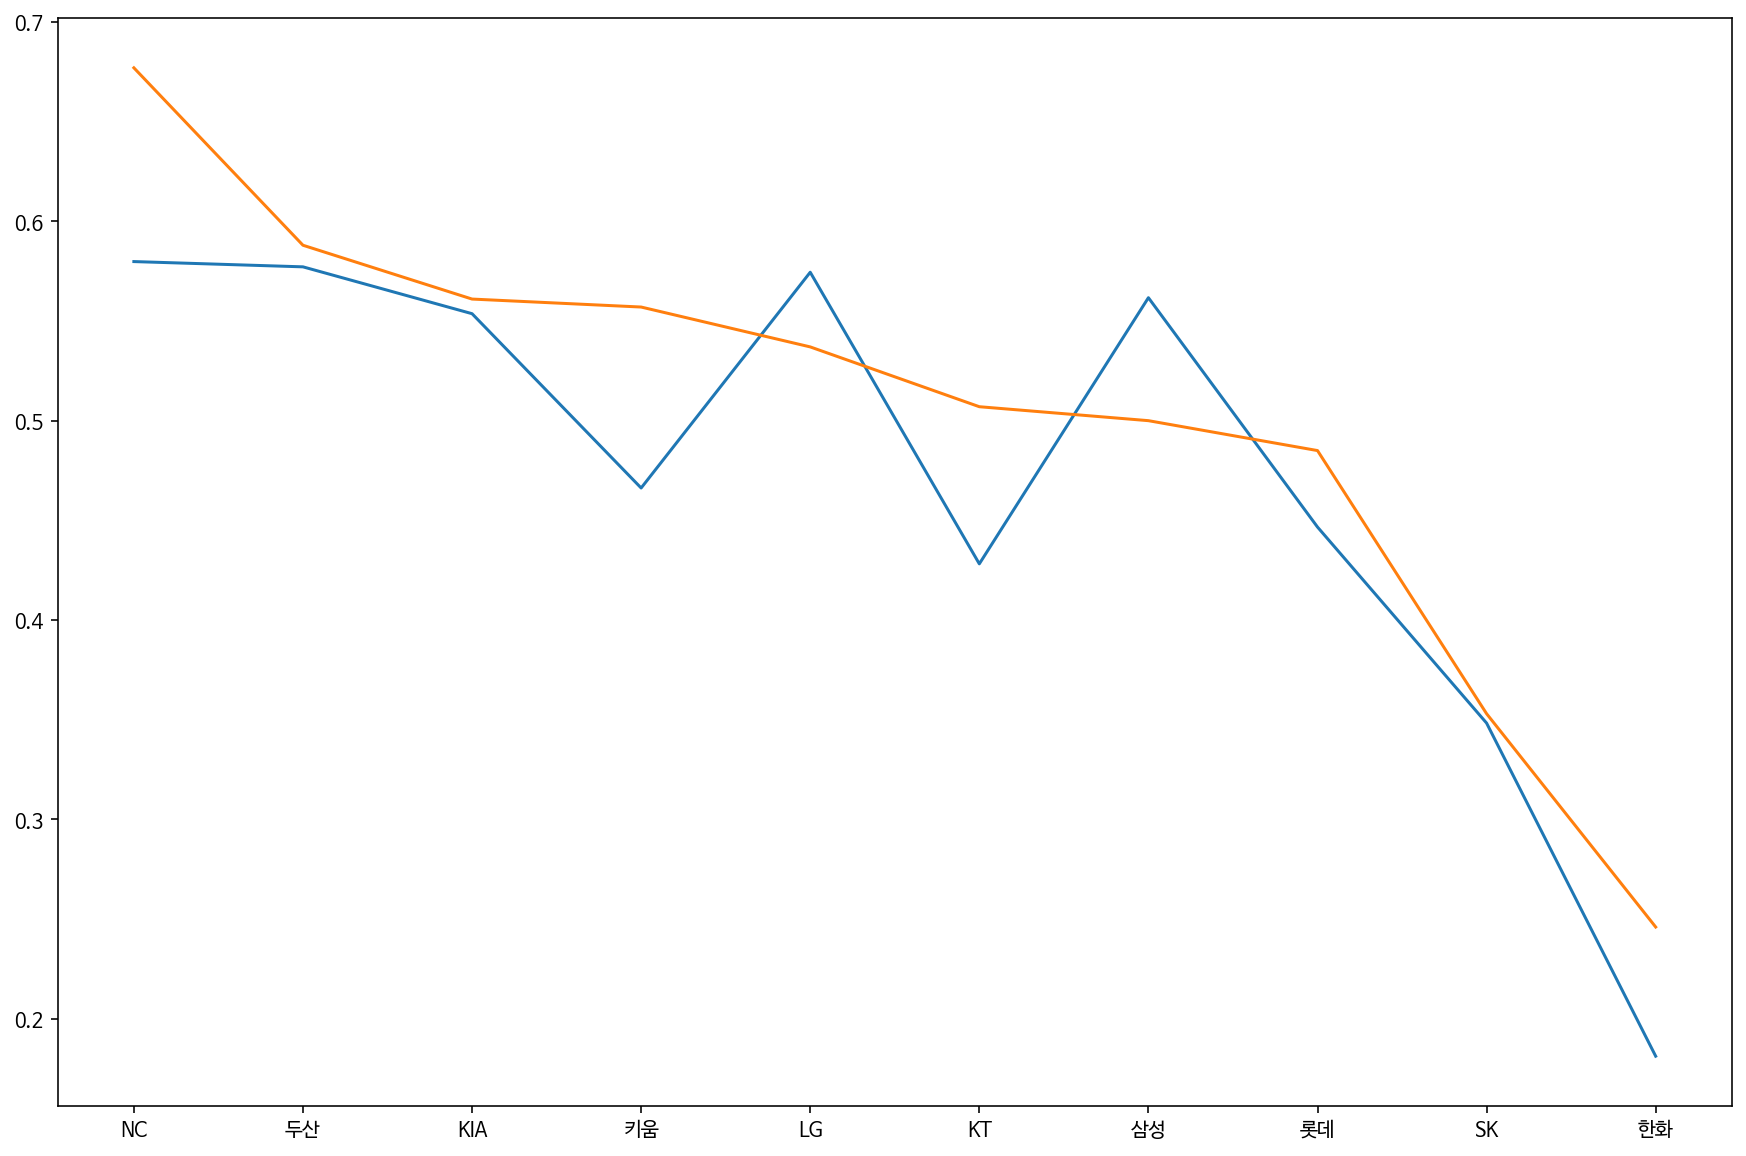

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(pred)
plt.plot(test)

# 일자별 시계열

In [ ]:
td = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/data_project/은경s/kbreport_hit_main_day_수정.csv', sep=',', encoding='cp949' )
dhm['팀명'][dhm['팀명']=='넥센'] = '키움'
dhm['팀명'][dhm['팀명']=='Hero'] = '키움'
dhm.head(3)

In [ ]:
td = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/data_project/은경s/kbreport_hit_standard_day_수정.csv', sep=',', encoding='cp949' )
dhs['팀명'][dhs['팀명']=='넥센'] = '키움'
dhs['팀명'][dhs['팀명']=='Hero'] = '키움'
dhs.head(3)

In [ ]:
td = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/data_project/은경s/kbreport_hit_advanced_day_수정.csv', sep=',', encoding='cp949' )
dha['팀명'][dha['팀명']=='넥센'] = '키움'
dha['팀명'][dha['팀명']=='Hero'] = '키움'
dha.head(3)

In [ ]:
td = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/data_project/은경s/kbreport_pit_main_day_수정.csv', sep=',', encoding='cp949' )
dpm['팀명'][dpm['팀명']=='넥센'] = '키움'
dpm['팀명'][dpm['팀명']=='Hero'] = '키움'
dpm.head(3)

In [ ]:
td = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/data_project/은경s/kbreport_pit_standard_day_수정.csv', sep=',', encoding='cp949' )
dps['팀명'][dps['팀명']=='넥센'] = '키움'
dps['팀명'][dps['팀명']=='Hero'] = '키움'
dps.head(3)

In [ ]:
td = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/data_project/은경s/kbreport_pit_advanced_day_수정.csv', sep=',', encoding='cp949' )
dpa['팀명'][dpa['팀명']=='넥센'] = '키움'
dpa['팀명'][dpa['팀명']=='Hero'] = '키움'
dpa.head(3)

In [ ]:
hit = dhm.merge(dhs).merge(dha)
hit['루타'] = hit['단타'] + hit['2루타']*2 + hit['3루타']*3 + hit['홈런']*4
# 일자별 데이터에 득점권타율_hitter가 없음

In [ ]:
hit = hit.loc[:, ['연도', '월', '일', '팀명', '타점', '볼넷', '사구', '삼진', '루타']]
hit.head(3)

In [ ]:
pit = dpm.merge(dps).merge(dpa)
pit = pit.loc[:, ['연도', '월', '일', '팀명', '팀승', '팀패', 'ERA', 'WHIP']]
pit.head(3)

In [ ]:
data = pd.merge(pit, hit)
data

In [ ]:
pd.pivot_table(data, index=['팀명', '연도', '월', '일'])

In [ ]:
data[data['연도'] == 2015]

In [ ]:
data['연도'].groupby(data['팀명'])